# Выпускной проект: интернет магазин "Пока все еще тут" - выявление профилей потребления.

## Материалы:
[Презентация] https://disk.yandex.ru/i/HcbUxlHudJsEOg

## Описание проекта.

**Описание:** Для интернет-магазина товаров для дома «Пока все ещё тут» провести полноценный анализ товарного ассортимента и сегментировать покупателей по профилю потребления для осуществления рекламных рассылок, т.е. составить подробные рекомендации заказчику по сегментам покупателей:
- в каком сегменте покупают часто, много и дорогой товар, а на какой сегмент возможно не стоит тратить время и деньги проводя рассылку;
- клиентам какого сегмента, когда и какие категории товара рассылать в рекламных предложениях (предварительно необходимо разбить товар на категории и разнести по категориям).
- как и для какого кластера можно попытаться увеличить количество продаваемого товара, повысить возвращаемость покупателей и т.д.

**Цель проекта:** Сегментировать покупателей по профилю потребления для осуществления рекламных рассылок.

**Основные задачи, которые необходимо выполнить:**
1. Предобработка данных
2. Категоризация товров
3. Исследовательский анализ
4. Кластеризация покупателей
5. Анализ кластеров покупателей
6. Проверка статистических гипотез.
7. Написание общего вывода и предложения.
8. Создание презентации по проекту.

**Ход исследования:**
Данные для анализа я получу из файла: 'ecom_dataset_upd.csv'. О качестве данных заранее ничего не известно, поэтому перед тем, как приступить к целям исследования понадобиться обзор данных.

Проверю данные на ошибки и оценю их влияние на исследование. На этапе предобработки поищу возможность исправить найденные ошибки, которые не преведут к искажению конечного результата.

Если потребуется, то создам новые поля в уже предоставленных данных, для решения поставленных задач.

*Таким образом мое исследование пройдет этапы:*
1. Загрузка данных.
2. Обзор данных.
3. Предобработка данных:
    - обработка дубликатов полных и неявных (если требуется),
    - изменение типов данных (если требуется),
    - обработка заказов с несколькими покупателями.
4. Категоризация товаров
5. Исследовательский анализ:
    - общий обзор,
    - анализ данных на аномалии и выбросы,
    - анализ покупателей.
    - временной анализ,
    - корреляция.
6. Кластаризация покупателей методом KMeans:
    - формирование признаков для кластеризации,
    - масштабирование признаков,
    - кластеризация.
6. Анализ кластеров покупателей:
    - анализ по ключевым метрикам (средний чек, частота заказов, выручка),
    - популярные категории товаров,
    - повторные покупки,
    - сезонность.
7. Проверка статестических гипотез:
    - Гипотеза 1: различие среднего чека между кластерами,
    - Гипотеза 2: различие количества заказов между кластерами.
8. Формирование общего вывода и рекомендаций.
9. Подготовка презентации проекта

## Описание данных.
Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

**Описание полей датасета /datasets/ecom_dataset_upd.csv:**
- *date* — дата заказа;
- *customer_id* — идентификатор покупателя;
- *order_id* — идентификатор заказа;
- *product* — наименование товара;
- *quantity* — количество товара в заказе;
- *price* — цена товара.

**Добавленные дополнительные поля:**
- *revenue* - выручка (revenue = quantity * price);
- *order_month* - номер месяца заказа и год;
- *category_product* - условная категория товара;
- *day_of_week* - день недели

## Загрузка данных.

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.dates as mdates # работа с датами
import plotly.express as px
import seaborn as sns
import matplotlib.ticker as ticker
import datetime as dt
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from ast import literal_eval
from scipy import stats as st #проверка гипотез
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import f_oneway, shapiro, kruskal, mannwhitneyu
from itertools import combinations


In [2]:
pd.set_option('display.max_columns', None)                  # команда для отображения всех столбцов датафрейма
# pd.set_option('display.max_rows', None)                   # команда для отображения всех строк датафрейма
pd.set_option('display.float_format', lambda x: '%.3f' % x) # перевод данных из экспоненциальной нотации в обычную
pd.options.display.max_colwidth = None                      # устанавливаем неограниченную ширину столбцов

In [3]:
# Загрузка данных
try:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/ecom_dataset_upd.csv')
    display("Файлы успешно загружены!")
    
except Exception as e:
    display(f'Не удалось прочитать файл: {e}') # вывод ошибки, если данные не прочитались

'Файлы успешно загружены!'

## Предобработка данных.

### Обзор данных.

In [4]:
df.head(10)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.000
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.000
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.000
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.000
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.000
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.000
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.000
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.000
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.000
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674.000


Данные выводятся без ошибок.

Требуется подробнее изучить данные поля 'date', т.к. они отображаются в нечитабельном виде, возможно требуется изменение типа данных.

Данные поля 'customer_id' - это UUID (Universally Unique Identifier) **универсальный уникальный идентификатор**. Каждый такой идентификатор: *уникален* — с огромной вероятностью он не повторится даже при генерации миллиарда ID; часто используется для идентификации пользователей, заказов, транзакций и других сущностей, особенно в распределённых системах. Преобразование поля не требуется.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


In [6]:
# Изучение пропусков
temp = df.copy()           # Делаем копию текущего датасета
missing = (pd.DataFrame({'Кол-во пропусков': temp.isnull().sum(), 'Доля пропусков': temp.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
missing

,Кол-во пропусков,Доля пропусков
date,0,0.000000
customer_id,0,0.000000
order_id,0,0.000000
product,0,0.000000
quantity,0,0.000000
price,0,0.000000


В датафрейме 7474 строк и 6 полей. 

Название столбцов написано корректно и не требует изменений. 

Пропуски в данных отсутствуют. 

Требуется изменение типов данных поля date (дата заказа) с int64 на data. 

### Обработка дубликатов.

Проверю данные на наличие полных (явных) и неявных дубликатов.
Неявные дубликаты посмотрю по сочетанию полей, без 'date'.


**Полные (явные) дубликаты.**

In [7]:
# явные дубликаты всего датафрейма
print('Количество полных дубликатов:', df.duplicated().sum())
print('Процент количества дубликатов:', df.duplicated().sum()/ len(df)* 100)

Количество полных дубликатов: 0
Процент количества дубликатов: 0.0


Полные дубликаты в данных отсутсутствую. Проверю датафрейм на наличие неявных дубликатов.

**Неявные дубликаты.**

*Неявные дубликаты буду искать по сочетанию всех полей без поля 'date', т.к.*:
- order_id уже однозначно указывает на заказ, а значит, косвенно — и на дату, то есть, если order_id совпадает, дата должна быть одинаковой;
- даже если даты немного отличаются, это может быть технической ошибкой, а по сути — один и тот же заказ;
- если включить date в проверку дубликатов, можно не обнаружить одинаковые записи, которые отличаются только датой — и таким образом упустить неявные дубликаты.

Перед началом проверки данных на неявные дубликаты откорректирую написание данных поля 'product' - приведу к единообразному виду: нижний регистр, удалить лишние пробелы и кавычки, замена ё на е.

In [8]:
df['product'] = (
    df['product']
    .str.lower()               # приведение к нижнему регистру
    .str.strip()               # удаление лишних пробелов по краям
    .str.replace('"', '', regex=False)  # удаление двойных кавычек
    .str.replace("'", '', regex=False)  # удаление одинарных кавычек
    .str.replace('ё', 'е')     # замена ё на е
)

# Поиск неявных дубликатов
dup_mask = df.duplicated(subset=['customer_id', 'order_id', 'product', 'quantity', 'price'], keep=False)

# Подсчёт количества и процента. Вывод
print('Количество неявных дубликатов:', dup_mask.sum())
print('Процент от всего датафрейма:', round(dup_mask.sum() / len(df) * 100, 2), '%')

Количество неявных дубликатов: 2369
Процент от всего датафрейма: 31.7 %


In [9]:
# Выводим найденные дубликаты
display(df[df.duplicated(subset=['customer_id', 'order_id', 'product', 'quantity', 'price'], keep=False)]
        .sort_values(by=['customer_id', 'order_id', 'product', 'quantity', 'price']))


,date,customer_id,order_id,product,quantity,price
2237,2019030710,0184f535-b60a-4914-a982-231e3f615206,14566,пеларгония розебудная margaretha укорененный черенок,1,135.000
2241,2019030711,0184f535-b60a-4914-a982-231e3f615206,14566,пеларгония розебудная margaretha укорененный черенок,1,135.000
2238,2019030710,0184f535-b60a-4914-a982-231e3f615206,14566,пеларгония розебудная mary укорененный черенок,1,135.000
2242,2019030711,0184f535-b60a-4914-a982-231e3f615206,14566,пеларгония розебудная mary укорененный черенок,1,135.000
2239,2019030710,0184f535-b60a-4914-a982-231e3f615206,14566,пеларгония розебудная prins nikolai укорененный черенок,1,135.000
...,...,...,...,...,...,...
6716,2019103007,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"таз пластмассовый со стиральной доской (иж), 1404021",1,397.000
6728,2019103100,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"таз пластмассовый со стиральной доской (иж), 1404021",1,397.000
6729,2019103102,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,73136,"таз пластмассовый со стиральной доской (иж), 1404021",1,397.000
1208,2018121423,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,69369,новогоднее дерево ель канадская коника ртк 343 d-9 см,1,389.000


Выведенные данные действительно являются дубликатами, таких строк в датафрейме 31,7% (2369). строки-дубликаты стоит удалить из анализа, т.к. они могут сильно исказить данные.

In [10]:
# Определяем набор полей для поиска неявных дубликатов (без даты)
duplicate_subset = ['customer_id', 'order_id', 'product', 'quantity', 'price']

# Количество строк до удаления
before = len(df)

# Удаление дубликатов — оставляем только первую строку
df = df.drop_duplicates(subset=duplicate_subset, keep='first')

# Количество строк после удаления
after = len(df)

# Выводим информацию
print(f"Удалено неявных дубликатов: {before - after}")
print(f"Оставшиеся строки: {after}")


Удалено неявных дубликатов: 1864
Оставшиеся строки: 5610


### Обработка типов данных.

Данные поля date преобразую в datetime и уберу время, т.к. оно не играет большой роли для анализа данных.

In [11]:
# Преобразуем поле 'date' из int64 в формат даты
# Удалим последние две цифры (часы)
df['date'] = pd.to_datetime(df['date'] // 100, format='%Y%m%d')

# Проверим результат 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5610 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5610 non-null   datetime64[ns]
 1   customer_id  5610 non-null   object        
 2   order_id     5610 non-null   int64         
 3   product      5610 non-null   object        
 4   quantity     5610 non-null   int64         
 5   price        5610 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 306.8+ KB


In [12]:
df.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.000
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.000
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.000
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.000
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.000


Изменение типа данных прошло успешно. Данные отображаются корректно.

### Проверка на заказы с несколькими покупателями.
В рамках этого шага сгруппирую данные по идентификатору заказа и покупателя, посмотрю, если одинаковые заказы, на которых приходится несколько покупателей.

In [13]:
# Проверка на заказы с несколькими покупателями
order_customer_counts = df.groupby('order_id')['customer_id'].nunique()
anomalous_orders = order_customer_counts[order_customer_counts > 1]
print("Заказы с несколькими покупателями:")
print(anomalous_orders)

Заказы с несколькими покупателями:
order_id
14872    2
68785    2
69283    2
69310    2
69345    2
69410    2
69485    3
69531    2
69833    2
70114    2
70542    2
70631    2
70726    2
70808    2
70903    2
70946    2
71054    2
71226    2
71461    2
71480    3
71542    2
71571    2
71648    2
71663    2
72188    2
72778    2
72790    2
72845    4
72950    2
Name: customer_id, dtype: int64


В анализируемых данных выявлены заказы с несколькими покупателями. Рассмотрю такие заказы подробнее и посчитаю их долю.

In [14]:
df[df['order_id'].isin(anomalous_orders.index)]


,date,customer_id,order_id,product,quantity,price
512,2018-10-28,0b5ce2c7-acef-4a9a-b821-61a44ed05557,68785,"сиденье в ванну раздвижное, белый, св5, ника",1,374.000
538,2018-10-30,c1dd5c0e-51db-4a5d-91a3-5374cb20043d,68785,"сиденье в ванну раздвижное, белый, св5, ника",1,374.000
1154,2018-12-10,2f955596-4b13-432e-93f3-6433395aafe6,69283,сушилка для белья на батарею ника сб6-65 двухъярусная,1,164.000
1160,2018-12-10,e3805ccd-2d64-4d0e-92dd-902293555c35,69283,сушилка для белья на батарею ника сб6-65 двухъярусная,1,164.000
1177,2018-12-11,954172a5-634c-4a50-941d-9db6d15a7377,69310,"муляж груша желтый 9,5 см полиуретан",7,59.000
...,...,...,...,...,...,...
6508,2019-10-04,25a8cd52-3efa-48ee-a6bd-d413d7e2b42f,72845,муляж яблоко зеленый 9 см полиуретан,40,59.000
6538,2019-10-07,2ac05362-3ca7-4d19-899c-7ba266902611,72845,муляж яблоко зеленый 9 см полиуретан,40,59.000
6576,2019-10-10,31a39955-8a93-42f3-8839-04a9693632a7,72778,шеффлера голд капелла d-12 см h-25 см,1,149.000
6601,2019-10-13,b1dbc7c4-3c84-40a7-80c9-46e2f79d24ad,72950,кастрюля эмалированная стэма с-1624 12 л цилиндрическая без рисунка 1506037,1,974.000


In [15]:
# Подсчет количества «аномальных» заказов (с несколькими customer_id)
n_bad_orders = anomalous_orders.shape[0]

# Подсчет количества уникальных заказов всего 
total_orders = df['order_id'].nunique()

# Доля аномальных заказов
share_pct = round(n_bad_orders / total_orders * 100, 2)

print(f"Всего заказов в выборке: {total_orders}")
print(f"Аномальных (с несколькими покупателями): {n_bad_orders}")
print(f"Доля аномальных от всех заказов: {share_pct}%")


Всего заказов в выборке: 3521
Аномальных (с несколькими покупателями): 29
Доля аномальных от всех заказов: 0.82%


Проведя анализ заказов с несколькими покупателями, пришла к выводу, что это ошибочные заказы, т.к. обычно каждый заказ должен быть привязан к одному покупателю. Несоответствие вероятнее всего возникло из-за:
- ошибок при выгрузке данных,
- дублирования заказов.

Доля аномальных заказов менее 1% и их удаление из анализа не исказит данных.

Далее для анализа приму датафрейм df, в который отфильтрую данные без учета «аномальных» заказов (с несколькими customer_id).


In [16]:
df = df[~df['order_id'].isin(anomalous_orders.index)]

# Проверим результат

print(f"После фильтрации: {df.shape[0]} строк")

После фильтрации: 5544 строк


Аномальные зказы удала, всего удалилось с датафрейма 66 строк.

### Поля с выручкой и месяцем.
Подсчитаю выручку в дополнительное поле 'revenue' (revenue = quantity * price).

Вывду месяц с даты в поле 'order_month'.


In [17]:
# выручка
df['revenue'] = df['quantity'] * df['price']

# месяц
#df['month'] = df['date'].dt.to_period('M')
# df['month'] = df['date'].dt.month
df['order_month'] = df['date'].dt.to_period('M').astype(str)


# Посмотрим, что осталось
temp = df.copy() 
list_c = ['customer_id', 'order_id', 'order_month']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5544 entries, 0 to 7473
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         5544 non-null   datetime64[ns]
 1   customer_id  5544 non-null   object        
 2   order_id     5544 non-null   int64         
 3   product      5544 non-null   object        
 4   quantity     5544 non-null   int64         
 5   price        5544 non-null   float64       
 6   revenue      5544 non-null   float64       
 7   order_month  5544 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 389.8+ KB
None
-------------------------
customer_id ['000d6849-084e-4d9f-ac03-37174eaf60c4'
 '001cee7f-0b29-4716-b202-0042213ab038'
 '00299f34-5385-4d13-9aea-c80b81658e1b' ...
 'ffb5976a-7a4d-460b-95c4-5ffaba31cb24'
 'ffb80538-3fda-4351-8ea9-9d2bec58bb07'
 'ffe82299-3f5b-4214-87fe-3d36ecccfac3']
customer_id : кол-во NaN 0 , проц

### Вывод по предобработке.

**В ходе предобработке было выполнено следующее:**
1. Обзор данных.
2. Обработка дубликатов.
3. Обработка заказов с несколькими покупателями.
4. Обработка типов данных.
5. Добавление дополнительных полей с выручкой и месяцем.

**Выводы:**
1. *Обзор данных.*
    - в датафрейме 7474 строк и 6 полей,
    - название столбцов написано корректно и не требует изменений,
    - пропуски в данных отсутствуют.
    
2. *Обработка дубликатов.*
- полные (явные) дубликаты - при анализе "сырых" данных, не выявлены;
- неявные дубликаты:
    - определялись по сочетанию всех полей без учута поля с датой,
    - перед началом обработки неявных дубликатов, приведены к единообразному написанию данные в поле 'product' (наименование товара),
    - неявных дубликатов выявлено 2369 строк (или 31,7% от всех данных),
    - такие дубликаты (без учета первого вхождения) удалены, т.к. они могут сильно исказить последующий анализ,
    - после удаления дубликатов в датафрейме осталось 5610 строк.

3. *Обработка заказов с несколькими покупателями.*
- Проведя анализ заказов с несколькими покупателями, пришла к выводу, что это ошибочные заказы, т.к. обычно каждый заказ должен быть привязан к одному покупателю. Несоответствие вероятнее всего возникло из-за:
    - ошибок при выгрузке данных,
    - дублирования заказов.
- Доля аномальных заказов менее 1% и их удаление из анализа не исказит данных.
- Всего удалено 66 строк с аномальными заказами. Осталось для анализа 5544 строки.
    
4. *Обработка типов данных.*
- поле date преобразовала в datetime и уберала время, т.к. оно не играет большой роли для анализа данных;
- остальные поля не требуют изменения типа.

5. *Дополнительные поля.*
- поле с подсчетом выручки 'revenue' (revenue = quantity * price);
- поле с номером месяца 'month'.

## Категоризация товаров.
**Цель:** создать 5–7 категорий товаров и присвоить каждой строке/товару из колонки product соответствующую категорию в новом поле category_product:
- кластеризация по ключевым словам или ручная разметка,
- присвоение категорий,
- привязка заказов к категориям.

Первым делом посмотрю список уникальных значений поля product, что бы определить, какие категории выделить.

In [18]:
# df['product'].unique()
df['product'].value_counts().reset_index(name='count').rename(columns={'index': 'product'})


,product,count
0,пеларгония розебудная red pandora укорененный черенок,65
1,пеларгония розебудная prins nikolai укорененный черенок,54
2,пеларгония зональная диам. 12 см сиреневый полумахровый,53
3,сумка-тележка 2-х колесная gimi argo синяя,47
4,пеларгония розебудная mary укорененный черенок,40
...,...,...
2326,штора для ванной комнаты bacchetta rue de papillion черная текстильная 180х200 см 3026,1
2327,"ерш унитазный с подставкой wc стандарт, мультипласт 1712010",1
2328,"утюг электрический с керамическим покрытием delta lux dl-350 зеленый, 2200 вт , россия",1
2329,гладильная доска gimi pollicino 73x32 см,1


Проведя анлиз уникальных значений поля 'product' и частоту их вхождений, можно выделить 7 условных категорий товаров:
1. Растения и рассада
2. Искусственные цветы и декор
3. Кухонная утварь и посуда
4. Домашний тестиль
5. Уборка, стирка, сушка, быт. химия
6. Инструменты и хоз. товары
7. Хранение и сумки.

In [19]:
# 1. Словарь для 7 категорий
category_keywords = {
    'Растения и рассада': [
        'рассада','пеларгония','петуния','герань','бакопа','калибрахоа',
        'мята','розмарин','тимьян','базилик','лаванда','фиал','азалия',
        'хризантема','антуриум','дендробиум','спатифиллум','монарда',
        'диффенбах','калан','эхин','импатиенс','колеус','кактус','суспенси',
        'растение', 'циперус', 'радермахера', 'юкка', 'настурция', 'роза', 'эвкалипт',
        'томата', 'гвоздика', 'колокольчик', 'арбуз', 'котовник', 'укроп', 'клубника',
        'мирт', 'клен', 'декабрист', 'хлорофитум', 'овсянница', 'афеляндра', 'вербейник',
        'лобелия', 'мимоза', 'алоэ вера', 'примула', 'дыня', 'камнеломка', 'калатея', 'вербена',
        'незабудка', 'нивянник', 'лавр', 'томат', 'петрушк', 'бальзами', 'мединилла', 'гипсофила',
        'эхеверия', 'ясколка', 'флокс', 'седум', 'шеффлера', 'ранункулус', 'физостегия', 'огурец',
        'капуст', 'лен', 'тюльпан', 'гардения', 'кореопсис', 'цикламен', 'табак', 'чабер', 'в горшке', 'обыкновенн',
        'пуансет','аптения', 'цинни', 'пиретрум', 'платикодон', 'хамедор', 'космея', 'бархат', 'земляник', 'сельдерей',
        'виноград', 'гербер', 'алиссум', 'черенок', 'виола', 'змееголовник', 'd-', 'h-', 'лук', 'салат', 'калла', 'ель',
        'астра', 'лапчатка', 'вероника', 'бегония', 'шалфей', 'кипарис', 'энотера', 'в кассете', 'георгин',
        'рудбекия', 'окрасок', 'солидаго', 'барвинок', 'анемона', 'бадан', 'цинерария', 'годеция', 'лаватера',
        'смолевка', 'гайлардия', 'эшшольция', 'горох', 'хоста', 'морковь', 'чашелистом'
    ],
    'Искусственные цветы и декор': [
        'муляж','искусств','композици','букет','декоративн','гирлян','ваза',
        'новогоднее дерево', 'кашпо', 'фоторамка', 'пуф детск', 'детский пуф'
    ],
    'Кухонная утварь и посуда': [
        'тарел','чаш','ложк','вилк','сковород','кастр','чайник','кувшин',
        'миска','контейнер','пресс','терка','соковар','мешок для','ковш','столов',
        'хлебница', 'банка', 'салатник', 'блюдо', 'просеиватель для муки',
        'кружек', 'толкушка', 'разделочная', 'блюдце', 'кружка', 'противень',
        'набор фужеров', 'стакан', 'масленка', 'чайный набор', 'салфетница',
        'для выпечки', 'кондитерск', 'бокалов', 'картофелемялк', 'сито', 'для кексов',
        'сотейник', 'сахарниц', 'половник', 'скалка', 'венчик', 'тортниц', 'бульонница', 'набор посуды', 'ножн',
        'овощеварк','мантоварк', 'ножей', 'нож кухонный', 'нож для мясорубки', 'нож для', 'ножеточ',
        'овощечист', 'рыбочистк', 'нож ', 'соковыжималк', 'орехоколк', 'отделитель косточек'
        
    ],
    'Домашний текстиль': [
        'халат','одеяло','наматрасн','покрыв','простын','скатерт','коврик',
        'наволоч','чехол','махровое','покрывало','подушка','полотенц', 'плед',
        'ковер', 'салфеток', 'ковров', 'штора текстильная', 'полотен', 'ткань',
        'белье', 'пододеяльник'
    ],
    'Уборка, стирка, сушка и быт. химия': [
        'сушилка', 'сушилка для белья настенная', 'лиан','щетк','швабр','тряпк','дозатор','мыло','гель',
        'перчат','вантуз','мешок для стир','опаласкив','средство','салфетк',
        'ерш', 'гладильная', 'таз', 'для гладильной', 'корыто', 'подрукавник',
        'подголовник', 'зубная', 'паста', 'пена для ванн', 'порошок', 'стиральный', 'чистящий крем',
        'антижир', 'веник','сметка','совок', 'ролик для чистки', 'сменный блок', 'для мытья', 
        'для глажения', 'для стирки', ' для белья', 'отбеливател', 'гладильной доски', 'для посудомоеч',
        'отжим для ведра', 'уголок', 'увлажняющая маска'
        
        
    ],
    'Инструменты и хоз. товары': [
        'инструмент','отверт','пила','лопат','крючок', 'стремянк','миксер',
        'утюг','насадк','шприц', 'резин', 'пружин', 'измельчит', 'термометр', 'весы',
        'карниз', 'штанга', 'вешал', 'плечики', 'под штангу для ванны и душа', 'штора для ванной',
        'сиденье в ванну', 'стяжка оконная','сверло', 'светильник', 'сверел', 'прищеп', 'губк', 
        'шило', 'котел', 'ведро', 'петля', 'фен', 'бензин', 'линейк', 'ванна', 'термос', 'термокружка',
        'бидон', 'для штор', 'для туалетной', 'фал капроновый', 'штангенциркул', 'ручка', 'ключниц',
        'измерительный угольник', 'завертка', 'подставка','зажигал', 'этажерк','решетк', 'электрическ',
        'шнур', 'напильник', 'измеритель', 'мыльница', 'электро', 'обувниц', 'скребок', 'фиксатор-шар',
        'для ванны', 'сварка'        
    ],
    'Хранение и сумки': [
        'корзин','контейнер','ящик','полк','стеллаж','урна','кофр','лоток',
        'тележка','сумка-тележка','транспорт','багаж', 'сумка для тележки',
        'комод', 'сумка хозяйственная', 'пакет', 'коробка', 'для хранения',
        'емкост'
    ]
}

# 2. Функция категоризации
def assign_category(name: str) -> str:
    for cat, kws in category_keywords.items():
        for kw in kws:
            if kw in name:
                return cat
    return None  # не попало ни в одну из 8

# 3. Применяем к очищенному названию
df['category_product'] = df['product'].apply(assign_category)

# 4. Проверяем результат
print(df['category_product'].value_counts(dropna=False))

# 5. Сохраняем «неназначенные» для ручной докатегоризации
df_unassigned = df[df['category_product'].isna()]

print(f"Осталось без категории: {len(df_unassigned)} строк")


Растения и рассада                    3455
Хранение и сумки                       422
Уборка, стирка, сушка и быт. химия     415
Инструменты и хоз. товары              373
Кухонная утварь и посуда               362
Домашний текстиль                      316
Искусственные цветы и декор            201
Name: category_product, dtype: int64
Осталось без категории: 0 строк


После распределения товаров по категориям, проверю вручную, нет ли ошибок в распределении. Возьму топ-50 названий товаров из каждой категории и глазами проверю, нет ли неуместных

In [20]:
for cat in df['category_product'].unique():
    print(f"\nКатегория: {cat}")
    display(df[df['category_product'] == cat]['product'].value_counts().head(50))



Категория: Растения и рассада


пеларгония розебудная red pandora укорененный черенок                                    65
пеларгония розебудная prins nikolai укорененный черенок                                  54
пеларгония зональная диам. 12 см сиреневый полумахровый                                  53
пеларгония розебудная mary укорененный черенок                                           40
пеларгония розебудная margaretha укорененный черенок                                     31
пеларгония розебудная queen ingrid укорененный черенок                                   31
пеларгония зональная махровая лососевая                                                  25
пеларгония зональная ринго вайт d-7 см h-10 см укорененный черенок                       25
пеларгония зональная диам. 12 см коралловая полумахровая                                 24
пеларгония зональная диам. 12 см темнорозовая полумахровая                               22
пеларгония зональная диам. 12 см красная махровая                               


Категория: Уборка, стирка, сушка и быт. химия


таз пластмассовый со стиральной доской (иж), 1404021                                                                              10
ерш унитазный с деревянной ручкой , ваир 1712012                                                                                   8
гладильная доска ника lora fashion hlf 123х46 см                                                                                   7
гладильная доска ника blues 124х46 см 5757                                                                                         7
гладильная доска sarayli new elegant 125x45 см                                                                                     7
гладильная доска ника дсп эконом 106,5х29 эк1                                                                                      7
подрукавник складной ника п                                                                                                        6
корыто оцинкованное 45 л бесшовное, 1303007                          


Категория: Домашний текстиль


чехол для костюма 60х110 см rozenbal r261016                                                                                        8
подкладка под чехол zalger 520114 135х50 см войлок                                                                                  7
подкладка под чехол zalger 520140 135х50 см поролон                                                                                 6
чехол для гладильной доски attribute metal 140х60 см abm106                                                                         6
коврик придверный хлопковый 60х140 см мультиколор, helex, с04                                                                       5
коврик придверный attribute nature кокосовый 60x40 см amc015                                                                        5
коврик хлопковый 40х60 см цвета в ассортименте 6194                                                                                 5
чехол eurogold clean basic хлопок для досок 120х38-120х42 см c


Категория: Инструменты и хоз. товары


сумка для тележки большая комбинированная 45*30*25, 1209021                                                                  9
стяжка оконная с болтом ст-55 цинк, 1108354                                                                                  6
карниз для ванной комнаты виолет раздвижной 280 см с кольцами бежевый 2810/2                                                 5
плечики пластмассовые размер 48 - 54 мп 1205160                                                                              5
сиденье в ванну раздвижное, белый, св5, ника                                                                                 5
штанга для ванной г-образная, угловая 80х170 см, хром                                                                        5
штора для ванной комнаты quadretto 240х200 см белая, bacchetta, 4062                                                         5
штора для ванной комнаты 240х200 verga белая текстильная 240х200 см 6040                                       


Категория: Хранение и сумки


сумка-тележка 2-х колесная gimi argo синяя                                                                 47
тележка багажная delta тбр-20 синий грузоподъемность 25 кг сумка и 50 кг каркас россия                     17
тележка багажная delta тбр-20 коричневый с оранжевым грузоподъемность 25 кг сумка и 50 кг каркас россия    16
тележка багажная delta тбр-15 цвет в ассортименте грузоподъемность 30 кг россия                            10
сумка-тележка 2-х колесная gimi argo красная                                                                9
тележка багажная delta тбр-21 черный грузоподъемность 25 кг для сумка и 50 кг для каркас россия             8
тележка багажная delta dt-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия                       8
тележка багажная delta тбр-20 черный с серым грузоподъемность 25 кг сумка 50 кг каркас россия               8
сумка-тележка 2-х колесная gimi galaxy черная                                                               7
сумка-теле


Категория: Кухонная утварь и посуда


кувшин пластмассовый с крышкой кумган 2,0 л 1408003                                                 5
банка со стеклянной крышкой, color series, круглая, 7*7,6*12,5 см, 280 мл valiant, jp-s280          5
овощеварка алюминиевая scovo мт-045, хозлэнд, 1502079                                               5
термокружка яромир кремль яр-2406м 400 мл                                                           5
контейнер для продуктов pasabahce 1,25 л голубой ots161560-005                                      4
хлебница деревянная (бук) кб-028, 35х28х19 см 1524002                                               4
сковорода hard 28 см, алюминиевая, с антипригарным покрытием, attribute, afd028                     4
вилка столовая ripple сталь 3 мм, 3 шт, attribute, acr013                                           4
тарелка обеденная котон флауэр 25 см h2776 luminarc                                                 4
миска фазенда пц2311злпр 1,5 л                                                    


Категория: Искусственные цветы и декор


муляж баклажан 18 см                                                                             10
искусственная композиция из цветов пластиковая ромашка мини розовая                               9
муляж яблоко, оранжевый, 8,5 см, полиуретан                                                       8
цветок искусственный крокус 20 см                                                                 7
муляж яблоко 9 см красное                                                                         6
муляж банан желтый 21 см полиуретан                                                               6
муляж перец чили в связке, красный, 60 см, полиуретан, fancy fair/ff rp60                         5
муляж лимон желтый 9 см полиуретан                                                                5
муляж желудь 2 шт                                                                                 5
муляж перец чили мини 2 шт, красный 7 см                                                          4


Есть некоторые позиции, которые попали не в ту категорию. Разнесу эти позиции по нужным категориям вручную. И визуализирую распреление товаров по категориям.

In [21]:
# Уборка, стирка, сушка и быт. химия
df.loc[df['product'] == 'сушилка для белья настенная zalger prima 510-720 веревочная 7 линий 25 м', 'category_product'] = 'Уборка, стирка, сушка и быт. химия'
df.loc[df['product'] == 'окномойка с алюминиевой телескопической ручкой со съемной насадкой 57373 1804049', 'category_product'] = 'Уборка, стирка, сушка и быт. химия'
df.loc[df['product'] == 'сушилка для белья потолочная лиана 2,0 м 1703009', 'category_product'] = 'Уборка, стирка, сушка и быт. химия'
df.loc[df['product'] == 'щетка для посуды из искусственного волокна и пластмассы 20 см белая, burstenmann, 0703/0065', 'category_product'] = 'Уборка, стирка, сушка и быт. химия'
df.loc[df['product'] == 'сушилка для белья потолочная лиана 2,4 м 1703011', 'category_product'] = 'Уборка, стирка, сушка и быт. химия'
df.loc[df['product'] == 'сушилка для белья напольная ника сбп1/с 18 м', 'category_product'] = 'Уборка, стирка, сушка и быт. химия'

# Хранение и сумки
df.loc[df['product'] == 'сумка для тележки большая комбинированная 45*30*25, 1209021', 'category_product'] = 'Хранение и сумки'
df.loc[df['product'] == 'сумка-тележка 2-х колесная складная gimi flexi зеленая', 'category_product'] = 'Хранение и сумки'

# Домашний текстиль
df.loc[df['product'] == 'подушка декоративная флисовая 100% полиэстер 40*40 см синяя клетка, wellness, wp44-атланта_34', 'category_product'] = 'Домашний текстиль'

# Искусственные цветы и декор
df.loc[df['product'] == 'муляж яблоко зеленый 9 см полиуретан', 'category_product'] = 'Искусственные цветы и декор'

# Инструменты и хоз. товары
df.loc[df['product'] == 'ящик почтовый металлический с ушками для навесного замка домик 1205251', 'category_product'] = 'Инструменты и хоз. товары'


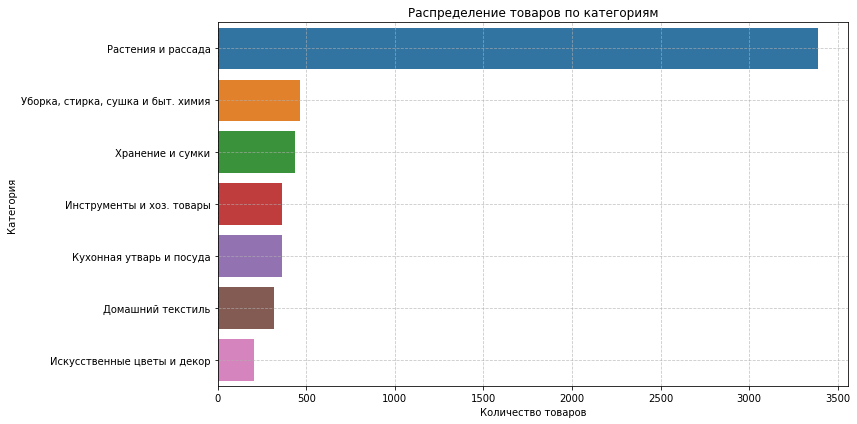

In [22]:
# размер графика
plt.figure(figsize=(12, 6))

sns.countplot(data=df, y='category_product', order=df['category_product'].value_counts().index)

plt.title('Распределение товаров по категориям')
plt.xlabel('Количество товаров')
plt.ylabel('Категория')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


Из графика распределения товара по категориям видно, что наибольшее количество позиций (т.е. 3494) относится к условной категории "Растения и рассада". Остальные категории значительно уступают по количеству товаров. Наименьшая категория - "Искусственные цветы и декор" (205 позиций).

### Вывод по категоризации товаров.

**На данном шаге была выполнена следующая работа:**
1. проведен анализ уникальных названий товаров;
2. на основе анализа уникальных названий по ключевым словам и вручную, выделены условные категории товаров:
    - Растения и рассада
    - Искусственные цветы и декор
    - Кухонная утварь и посуда
    - Домашний тестиль
    - Уборка, стирка, сушка, быт. химия
    - Инструменты и хоз. товары
    - Хранение и сумки;
3. присвоина каждой строке/товару из колонки product соответствующую категория в новом поле category_produc;
4. визализировано распределение количества товаров по категориям.

**Выводы по распределению товаров по категориям:**
1. Количество позиций в каждой категории
- Растения и рассада                     3494
- Хранение и сумки                       426
- Уборка, стирка, сушка и быт. химия     417
- Инструменты и хоз. товары              381
- Кухонная утварь и посуда               367
- Домашний текстиль                      320
- Искусственные цветы и декор            205
2. Наибольшее количество позиций (т.е. 3494) относится к условной категории "Растения и рассада". Остальные категории значительно уступают по количеству товаров. Наименьшая категория - "Искусственные цветы и декор" (205 позиций).

## Исследовательский анализ (EDA).
**Цель:** Понять структуру и особенности поведения покупателей, выявить закономерности и аномалии.
1. **Общий обзор:**
- общий анализ статистических данных всего датафрейма (выявить: количество уникальных покупателей, заказов, товаров; временной охват данных);
- посмотреть распределение заказов по месяцам;
- посмотреть распределение количества товаров в заказах.

2. **Анализ данных на аномалии и выбросы.**
- проверка на выбросы по количеству (quantity);
- проверка на выбросы по цене (price);
- аномалии по датам (date);
- аномальные значения выручки (revenue);
- проверка на заказы с несколькими покупателями.

3. **Анализ покупателей:**
- топ-20 товаров по выручке и количеству;
- сезонные пики (по месяцам).

4. **Временной анализ:**
- распределение заказов по годам/месяцам;
- праздничные пики, акции.

5. **Корреляция:**
- связь между количеством товаров и ценой;
- связь между выручкой и количеством заказов.


### Общий обзор.


#### Анализ статистических данных.

In [23]:
# статистика по всем столбцам
df.describe(include='all').T 

/tmp/ipykernel_104/1509171520.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
date,5544,483,2019-04-24 00:00:00,85,2018-10-01,2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,5544,2413,c971fb21-d54c-4134-938f-16b62ee86d3b,143,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_id,5544.000,NaN,NaN,NaN,NaT,NaT,55864.753,32499.808,12624.000,14810.000,69186.000,71934.500,112789.000
product,5544,2331,пеларгония розебудная red pandora укорененный черенок,65,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity,5544.000,NaN,NaN,NaN,NaT,NaT,2.582,16.477,1.000,1.000,1.000,1.000,1000.000
price,5544.000,NaN,NaN,NaN,NaT,NaT,530.368,973.768,9.000,90.000,150.000,524.000,14917.000
revenue,5544.000,NaN,NaN,NaN,NaT,NaT,829.957,9206.163,9.000,120.000,194.000,734.000,675000.000
order_month,5544,16,2019-05,729,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_product,5544,7,Растения и рассада,3391,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Анализ статистических данных:**
1. ***'date' (дата заказа)*** 
- в датафрейме предсталены данные за период с 01.10.2018 года по 31.01.2020 года,
- самая часто встречающаяся дата 24.04.2019 (встречается в 85 строках).

2. ***'order_month' (месяц заказа)***
- чаще всего заказы делали в мае 2019 года, этот месяц встречается в данных 737 раз.

3. ***'product' (наименование товра)*** 
- представлено 2340 уникальных позиций,
- наиболее популярный товар "пеларгония розебудная red pandora укорененный черенок", встречается 67 раз.

4. ***'quantity' (количество товара в заказе)***
- min количество 1, max количество 1000,
- среднее значение 2,6 товаров в заказе, медианное значение 1 товар в заказе,
- стандартное отклонение довольно велико 16,4, что указывает на большую вариативность и возможные выбросы,
- 75% заказов имеют только 1 товар.

5. ***'price' (цена товара)***
- min 9 уе, max 14917 уе,
- среднее значение 530 уе, медианное значение 150 уе,
- стандартное отклонение 971 довольно большое, что указывает на большую вариативность денных и возможные выбросы,
- 25% товаров менее 90 уе, 50% менее 150 уе, 75% менее 524 уе.


#### Распределение заказов по месяцам. 
Посмотрю на общее распределение количества заказов за все года по месяцам.

,order_month,orders_count
7,2019-05,729
6,2019-04,673
0,2018-10,482
1,2018-11,428
5,2019-03,409
4,2019-02,360
9,2019-07,313
2,2018-12,307
8,2019-06,295
15,2020-01,269


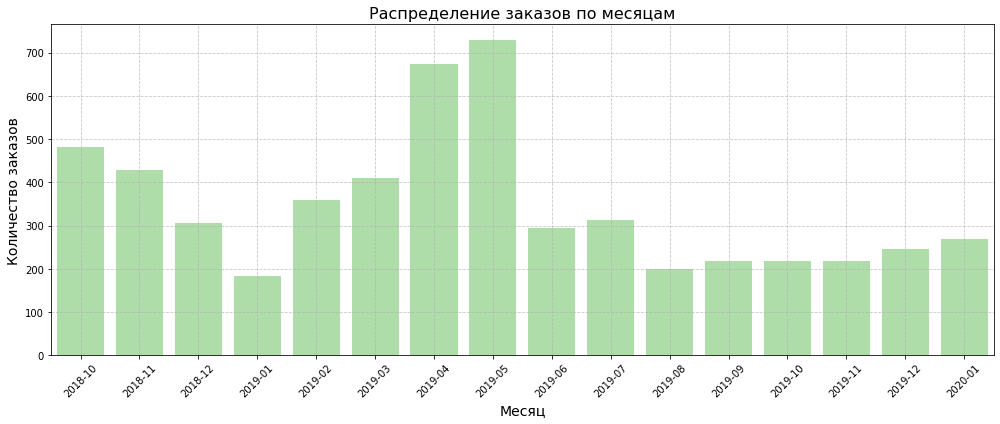

In [24]:
# Группируем по месяцам и считаем количество заказов
monthly_orders = df.groupby('order_month').size().reset_index(name='orders_count')

# Сортируем по хронологии
monthly_orders = monthly_orders.sort_values('order_month')

display(monthly_orders.sort_values('orders_count', ascending=False))

# Визуализируем
plt.figure(figsize=(14, 6))

sns.barplot(data=monthly_orders, x='order_month', y='orders_count', color='#A8E6A1')

plt.title('Распределение заказов по месяцам', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Количество заказов', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


**Из выведенных данных распределения заказов по месяцам видно, что:**
1. Наибольшее количество заказов было оформлено в мае 2019 (737) и апреле 2019 (677), а так же в октябре 2018 (484) и ноябре 2018 (428); остальные месяца значительно отстают.
2. Общая тенденция распределения заказов
- с октября 2018 по январь 2019 (включительно) наблюдается снижение количества заказов,
- с февраля по май 2019 - рост числа заказов,
- далее с июня 2019 виден значительный спад,
- с августа 2019 года график стабилизируется, только в январе 2020 наблюдается небольшой рост.
3. Разница с самым лучшим месяцем - май 2019 и самым худшим месяцем - январь 2019 составляет 75%.

#### Распределение количества товаров в заказах.

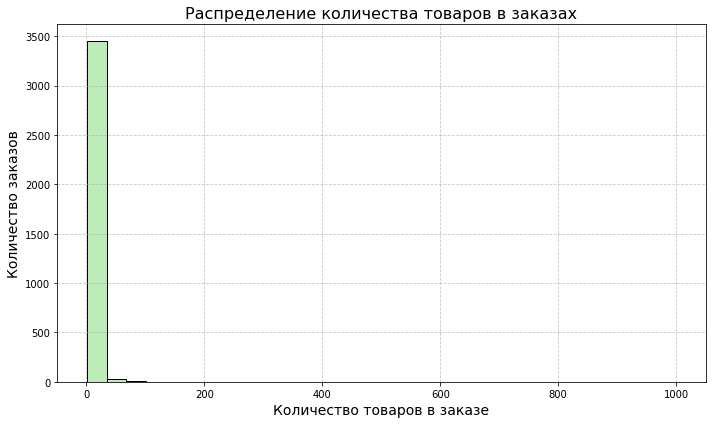

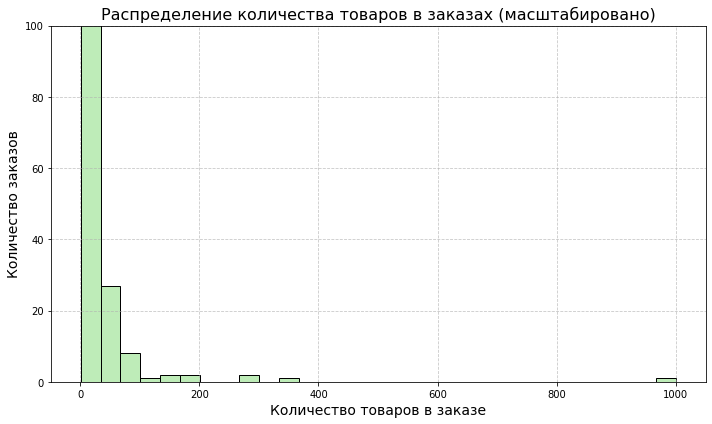

In [25]:
# количество товаров в каждом заказе
order_items_count = df.groupby('order_id')['quantity'].sum().reset_index(name='items_count')

# построение графика
# Первый график — обычный
plt.figure(figsize=(10, 6))
sns.histplot(order_items_count['items_count'], bins=30, color='#A8E6A1')
plt.title('Распределение количества товаров в заказах', fontsize=16)
plt.xlabel('Количество товаров в заказе', fontsize=14)
plt.ylabel('Количество заказов', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Второй график — с ограничением по оси Y
plt.figure(figsize=(10, 6))
sns.histplot(order_items_count['items_count'], bins=30, color='#A8E6A1')
plt.ylim(0, 100)  # <== масштабирование Y оси, например, максимум 100 заказов
plt.title('Распределение количества товаров в заказах (масштабировано)', fontsize=16)
plt.xlabel('Количество товаров в заказе', fontsize=14)
plt.ylabel('Количество заказов', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [26]:
# общее количество заказов
total_orders = order_items_count.shape[0]

#подсчет заказов с 1 товаром
order_items_count_1 = order_items_count[order_items_count['items_count'] <= 1].shape[0]

# подсчет заказов не более чем с 10 товарами
order_items_count_10 = order_items_count[order_items_count['items_count'] <= 10].shape[0]

# вывод данных и подчет долей
print('Количество заказов с не более чем с 1 товаром:', order_items_count_1)
print('Доля заказов с не более чем 1 товаром:', round((order_items_count_1 / total_orders) * 100, 2), '%')
print('Количество заказов с не более чем с 10 товарами:', order_items_count_10)
print('Доля заказов с не более чем 10 товаром:', round((order_items_count_10 / total_orders) * 100, 2), '%')

Количество заказов с не более чем с 1 товаром: 2431
Доля заказов с не более чем 1 товаром: 69.62 %
Количество заказов с не более чем с 10 товарами: 3256
Доля заказов с не более чем 10 товаром: 93.24 %


**Анализ распределения количества товаров в заказе:**
1. Большая часть заказов имеет только по одному товару (69%)
2. Доля заказов имеющих до 10 товаров 93%
3. Так же на массштабированно графике видно, что после 200 товаров в заказе, вероятние всего заказы с количеством товаров боле 200 - это выбросы.

### Анализ на аномалии и выбросы.
Анализ аномалий и выбросов помогает выявить потенциальные ошибки, необычное поведение пользователей или редкие события, которые могут исказить выводы или повлиять на бизнес. 

***В рамках предоставленного набора данных можно провести следующий анализ:***
- проверка на выбросы по количеству (quantity);
- проверка на выбросы по цене (price);
- аномалии по датам (date);
- аномальные значения выручки (revenue);
- проверка на заказы с несколькими покупателями.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5544 entries, 0 to 7473
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              5544 non-null   datetime64[ns]
 1   customer_id       5544 non-null   object        
 2   order_id          5544 non-null   int64         
 3   product           5544 non-null   object        
 4   quantity          5544 non-null   int64         
 5   price             5544 non-null   float64       
 6   revenue           5544 non-null   float64       
 7   order_month       5544 non-null   object        
 8   category_product  5544 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 562.2+ KB


#### Проверка на выбросы по количеству (quantity).
Для определения аномайлий и выбросов построю графики Boxplot и выведу 95 и 99 перецентили.


In [28]:
# Вывод 95 и 99 перцентилей
q95 = df['quantity'].quantile(0.95)
q99 = df['quantity'].quantile(0.99)

print(f"95-й перцентиль: {q95}")
print(f"99-й перцентиль: {q99}")


95-й перцентиль: 6.0
99-й перцентиль: 25.56999999999971


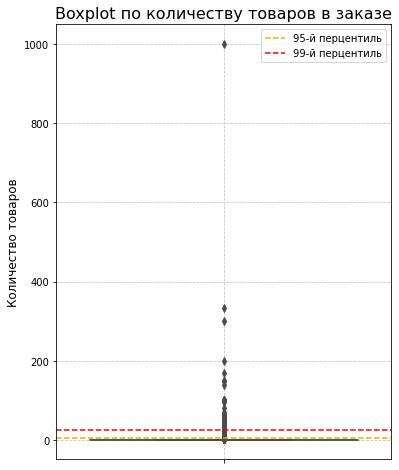

In [29]:
# Настройка размера графика
plt.figure(figsize=(6, 8))

# Построение ящика с усами
sns.boxplot(y=df['quantity'], color="steelblue")

# Настройки заголовка и осей
plt.axhline(q95, color='orange', linestyle='--', label='95-й перцентиль')
plt.axhline(q99, color='red', linestyle='--', label='99-й перцентиль')
plt.title('Boxplot по количеству товаров в заказе', fontsize=16)
plt.ylabel('Количество товаров', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Показ графика
plt.show()


Как показывает график, в данных по количеству товаров в заказе есть экстримальные выбросы.

А выведенные данные по перцентилям, говорят о том, что:
- 95-й перцентиль: 6.0 - не более 5% заказов имеют более 6 товаров,
- 99-й перцентиль: 30.0 - не более 1% заказов имеют более 30 товаров.

Удалять закзы по 95-му или 99-му не целесообразно, т.к. можно отсечь потенциальных оптовиков.Рассмотрю более подробно ТОП-15 заказов по количеству товаров.


In [30]:
# Группируем по заказу и товару, чтобы посмотреть максимальное количество единиц товара в одном заказе
top_quantity = (
    df.groupby(['order_id', 'product'])['quantity']
    .sum()
    .reset_index()
    .sort_values(by='quantity', ascending=False)
    .head(15)
)

display(top_quantity)


,order_id,product,quantity
4049,71743,"вантуз с деревянной ручкой d14 см красный, burstenmann, 0522/0000",1000
4012,71668,вешалки мягкие для деликатных вещей 3 шт шоколад,334
3921,71478,муляж яблоко 9 см красное,300
2817,69289,"ручка-скоба рс-100 белая *трибатрон*, 1108035",200
2351,68815,муляж яблоко 9 см красное,170
3608,70841,плечики пластмассовые размер 52 - 54 тула 1205158,150
2108,68611,"пружина дверная 240 мм оцинкованная (д-19 мм) без крепления, 1107014",150
2107,68611,"крепеж для пружины дверной, 1107055",150
2370,68831,муляж яблоко 9 см красное,140
3107,69893,щетка для мытья посуды колибри м5202 большая,100


Из ТОП-15 заказов по количеству товаров явно выбивается позиция на 1000 вантузов, остальные позиции вполне приемлемы для оптового заказа. Заказ на 1000 вантузов вероятнее всего выброс, удалю этот заказ из анализа.

In [31]:
# Удаляем заказы, где quantity > 6
df = df[df['quantity'] < 1000].copy()

# Проверим результат
print(f"После фильтрации: {df.shape[0]} строк")

После фильтрации: 5543 строк


#### Проверка на аномалии по датам (date).
В рамках этого шага посмотрю на даты анализируемого периода, выделю из даты номер дня недели в новое поле 'day_of_week', посчитаю частоту заказов по дням недели за весь рассматриваемый период и оценю распределение среднего значения частоты заказов по дням недели.

In [32]:
# Проверка диапазона дат
print("Минимальная и максимальная дата заказа:")
print(df['date'].min(), df['date'].max())

# Проверка активности по дням недели
df['day_of_week'] = df['date'].dt.dayofweek
print("Частота заказов по дням недели:")
display(df['day_of_week'].value_counts().sort_index())

Минимальная и максимальная дата заказа:
2018-10-01 00:00:00 2020-01-31 00:00:00
Частота заказов по дням недели:


0    953
1    910
2    814
3    901
4    729
5    563
6    673
Name: day_of_week, dtype: int64

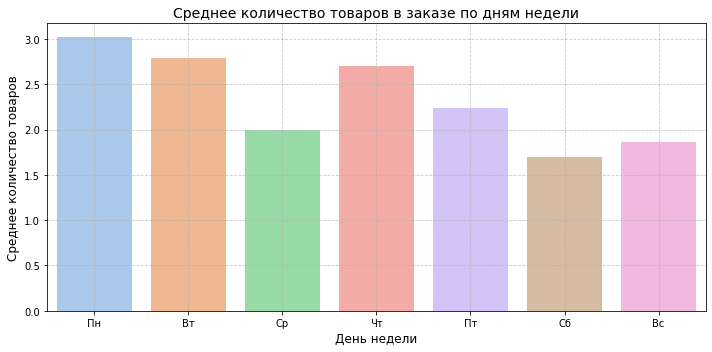

In [33]:
# Группировка: среднее количество товаров по дням недели
avg_quantity_per_day = df.groupby('day_of_week')['quantity'].mean().reindex(range(7))

# Построение столбчатой диаграммы
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_quantity_per_day.index, y=avg_quantity_per_day.values, palette='pastel')

# Настройка подписей и осей
plt.title('Среднее количество товаров в заказе по дням недели', fontsize=14)
plt.xlabel('День недели', fontsize=12)
plt.ylabel('Среднее количество товаров', fontsize=12)

# Установка русских названий дней недели
plt.xticks(
    ticks=range(7),
    labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'],
    rotation=0
)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



В частоте заказов и среднем распределения товаров в заказе по дням неделям аномалий не обнаружено. Чаще всего  заказы делают в понедельник, вторник и четверг, реже всегов субботу.

#### Проверка на аномальные значения выручки (revenue).

В рамках этого шага рассмотрю распределение выручки на гистограмме, выведу значения 95-го и 99-го перцентилий, построю Boxplot.

In [34]:
# Вывод 95 и 99 перцентилей
r95 = df['revenue'].quantile(0.95)
r99 = df['revenue'].quantile(0.99)

print(f"95-й перцентиль: {r95}")
print(f"99-й перцентиль: {r99}")

95-й перцентиль: 2849.8999999999996
99-й перцентиль: 6148.58


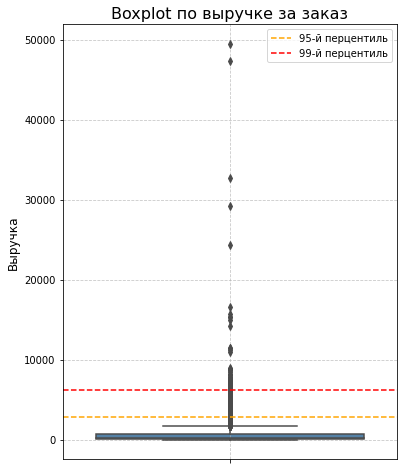

In [35]:
# Настройка размера графика
plt.figure(figsize=(6, 8))

# Построение ящика с усами
sns.boxplot(y=df['revenue'], color="steelblue")

# Настройки заголовка и осей
plt.axhline(r95, color='orange', linestyle='--', label='95-й перцентиль')
plt.axhline(r99, color='red', linestyle='--', label='99-й перцентиль')
plt.title('Boxplot по выручке за заказ', fontsize=16)
plt.ylabel('Выручка', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Показ графика
plt.show()

Как показывает график Boxplot, в данных по выручке за заказ есть выбросы.

А выведенные данные по перцентилям, говорят о том, что:
- 95-й перцентиль: 1649.0 - не более 5% заказов имеют выручку выше 2849 уе
- 99-й перцентиль: 2527.0 - не более 1% заказов имеют выручку выше 6148 уе.

Посмотрю более подробно ТОП-15 заказов по выручке.


In [36]:
# Топ-10 строк с наибольшей выручкой
top10_revenue = df.sort_values(by='revenue', ascending=False).head(15)
display(top10_revenue[['order_id', 'customer_id', 'product', 'quantity', 'price', 'revenue']])


,order_id,customer_id,product,quantity,price,revenue
5071,71668,146cd9bf-a95c-4afb-915b-5f6684b17444,вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.000,49432.000
1518,69830,58a4c3cc-504f-43ea-a74a-bae19e665552,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,27,1755.000,47385.000
1299,69504,6987e6d6-a63a-4ce2-a2d0-f424092d235e,тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия,57,574.000,32718.000
1023,69156,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,набор ножей attribute chef 5 предметов akf522,64,457.000,29248.000
661,68878,1b2764ad-9151-4051-a46a-9b01b62e6335,"урна уличная гео, hobbyka/хоббика, 59*37,5см, сталь",5,4874.000,24370.000
1675,70080,909564b8-3a5c-4d3e-8310-5ba1c837bbd7,мусорный контейнер hailo bigbin swing 45 0845-010 45 л хром,3,5512.000,16536.000
2971,71206,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,одеяло wellness t142 белое темостеганое 140х205 см чехол 100% полиэстер 200 г/м 4690659000306,10,1568.000,15680.000
7190,107812,f279d50f-a508-40b4-bde5-5cb4a1be3ad0,сумка-тележка хозяйственная rolser imx006 bassi logic tour бордовая,2,7679.000,15358.000
3961,71478,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,муляж яблоко 9 см красное,300,51.000,15300.000
5992,72139,0d87f4ae-465a-4fac-81e6-5d629761783e,сушилка уличная leifheit 85210 linomatic v 400 40 м 175х237х237 см зеленая,1,14917.000,14917.000


Посмотрев более подробно ТОП-15 заказов по выручке, аномалий не обнаружено, а те заказы у которых выручка превышает значение 99-го перцентиля вероятнее всего оптовые, т.к. это заказы с большим количеством товаров и цена за штуку у них в полне логичная, без аномалий.

#### Проверка на аномалии по количеству заказов на покупателя.
В рамках этого шага рассмотрю распределение количества заказов по покупателям, выведу значения 95-го и 99-го перцентилий, построю Boxplot.

In [37]:
# Группировка: количество уникальных заказов на одного покупателя
orders_per_customer = df.groupby('customer_id')['order_id'].nunique()

# расчет 95-го и 99-го перцентилей
c95 = orders_per_customer.quantile(0.95)
c99 = orders_per_customer.quantile(0.99)

print(f"95-й перцентиль по числу заказов на покупателя: {c95}")
print(f"99-й перцентиль по числу заказов на покупателя: {c99}")


95-й перцентиль по числу заказов на покупателя: 2.0
99-й перцентиль по числу заказов на покупателя: 3.0


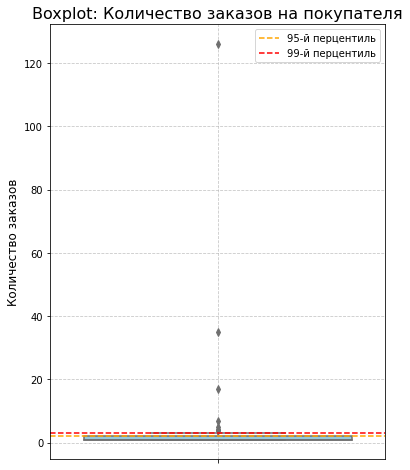

In [38]:
plt.figure(figsize=(6, 8))

sns.boxplot(y=orders_per_customer, color="skyblue")

# Линии перцентилей
plt.axhline(c95, color='orange', linestyle='--', label='95-й перцентиль')
plt.axhline(c99, color='red', linestyle='--', label='99-й перцентиль')

plt.title('Boxplot: Количество заказов на покупателя', fontsize=16)
plt.ylabel('Количество заказов', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.show()


Как показывает график Boxplot, в данных по количеству заказов на 1-го покупателя есть выбросы.

А выведенные данные по перцентилям, говорят о том, что:
- 95-й перцентиль: 2 - не более 5% покупателей имеют больше 2-х заказов.
- 99-й перцентиль: 3 - не более 1% покупателей имеют больше 3-х заказов.

Посмотрю более подробно ТОП-15 покупателей по количеству заказов.

In [39]:
# Считаем количество заказов на одного покупателя
top_customers = (
    df.groupby('customer_id')['order_id']
    .nunique()
    .sort_values(ascending=False)
    .head(15)
    .reset_index()
    .rename(columns={'order_id': 'orders_count'})
)

# Выводим результат
display(top_customers)


,customer_id,orders_count
0,c971fb21-d54c-4134-938f-16b62ee86d3b,126
1,4d93d3f6-8b24-403b-a74b-f5173e40d7db,35
2,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17
3,b7b865ab-0735-407f-8d0c-31f74d2806cc,7
4,0184f535-b60a-4914-a982-231e3f615206,5
5,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,4
6,bea7a833-2074-42db-bc49-4457abd3c930,4
7,e0535076-6270-4df2-8621-cb06264a94fa,4
8,552e17df-ba16-4e66-84fb-55a5557a6bea,3
9,d02429ab-22e0-4ff2-9465-3082befde444,3


По анализу ТОП-15 покупателей по количеству заказов резко выделяется покупатели (c971fb21-d54c-4134-938f-16b62ee86d3b и 4d93d3f6-8b24-403b-a74b-f5173e40d7db) с количеством заказов 126 и 35, вероятнее всего это выбросы: большинство клиентов совершают до 3 заказов, а несколько — на порядки больше. Такие клиенты не типичны для основной массы данных. Это, скорее всего, корпоративные клиенты или боты, поведение которых не отражает поведение основной аудитории и их вероятнее всего надо анализировать отдельной группой. Удалю этих клиентов из дальнейшего анализа и отфильтрую данные в новый датафрейм df_filtered.

In [40]:
# Список customer_id, которых нужно исключить
excluded_customers = [
    'c971fb21-d54c-4134-938f-16b62ee86d3b',
    '4d93d3f6-8b24-403b-a74b-f5173e40d7db'
]

# Фильтрация
df_filtered = df[~df['customer_id'].isin(excluded_customers)].copy()


# Проверим, что покупатель удалён
print(df_filtered['customer_id'].eq('c971fb21-d54c-4134-938f-16b62ee86d3b',
                                   '4d93d3f6-8b24-403b-a74b-f5173e40d7db').sum())  # должно быть 0


0


In [41]:
# Проверим результат
print(f"До фильтрации: {df.shape[0]} строк")
print(f"После фильтрации: {df_filtered.shape[0]} строк")


До фильтрации: 5543 строк
После фильтрации: 5355 строк


In [42]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5355 entries, 0 to 7473
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              5355 non-null   datetime64[ns]
 1   customer_id       5355 non-null   object        
 2   order_id          5355 non-null   int64         
 3   product           5355 non-null   object        
 4   quantity          5355 non-null   int64         
 5   price             5355 non-null   float64       
 6   revenue           5355 non-null   float64       
 7   order_month       5355 non-null   object        
 8   category_product  5355 non-null   object        
 9   day_of_week       5355 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 460.2+ KB


#### Выводы по анализу на аномалии и выбросы.

**В ходе анализа были выполнены следующие шаги:**
1. проверка на выбросы по количеству (quantity);
2. аномалии по датам (date);
3. аномальные значения выручки (revenue);
4. проверка на аномалии по количеству заказов на покупателя.

**Выводы:**
1. ***Выбросы по количеству товаров в заказе.***
- В данных есть экстримальные выбросы по количеству товаров в заказе.
- Данные по перцентилям, говорят о том, что:
    - 95-й перцентиль: 6.0 - не более 5% заказов имеют более 6 товаров,
    - 99-й перцентиль: 30.0 - не более 1% заказов имеют более 30 товаров.
- Удалять закзы по 95-му или 99-му не целесообразно, т.к. можно отсечь потенциальных оптовиков.
- Анализ ТОП-15 заказов по количеству товаров показал, что заказ на 1000 вантузов вероятнее всего выброс, удалила эти данные из анализа.

2. ***Аномалии по дате заказов.***
- В рамках этого шага выполнено:
    - просмотр дат анализируемого периода,
    - выделены из даты номер дня недели в новое поле 'day_of_week',
    - посчитана частота заказов по дням недели за весь рассматриваемый период,
    - оценено распределение среднего количества заказываемых товаров по дням недели.
- В частоте заказов и среднем распределения товаров в заказе по дням неделям не обнаружено аномалий.

3. ***Аномальные значения выручки.***
-  В данных по выручке за заказ есть выбросы.
- Данные по перцентилям, говорят о том, что:
    - 95-й перцентиль: 1649.0 - не более 5% заказов имеют выручку выше 2849 уе
    - 99-й перцентиль: 2527.0 - не более 1% заказов имеют выручку выше 6148 уе.
- Аналз ТОП-15 заказов по выручке не выявил аномалий, которые требуется удалить из анализа.

4. ***Аномалии по количеству заказов на 1-го покупателя.***
- В данных по количеству заказов на покупателя есть выбросы.
- Данные по перцентилям, говорят о том, что:
    - 95-й перцентиль: 2 - не более 5% покупателей имеют больше 2-х заказов,
    - 99-й перцентиль: 3 - не более 1% покупателей имеют больше 3-х заказов.
- Аналз ТОП-15 покупателей по количеству заказов показал, что сильно выделяется покупатель (c971fb21-d54c-4134-938f-16b62ee86d3b и 4d93d3f6-8b24-403b-a74b-f5173e40d7db) с количеством заказов 126 b 35, вероятнее всего это выброс, удалила данные с этими покупателями из дальнейшего анализа.

5. ***Далее для анализа отфильтровала данные в новый датафрейм df_filtered, из которого удалены все обнаруженные выбросы и аномалии. Датафрейм df_filtered имеет 5355 строк и 10 полей, т.е. удалено 189 строки (3,4%) с аномальными данными и выбросами.***


### Анализ покупателей.
Анализ покупателей позволит определить: какие товары/категории формируют максимальную выручку и объём, сезонные пики спроса, супер‑покупатилей.

**В рамках этого шага определю следующее:**
- ТОП-категорий товаров по выручке и количеству;
- сезонные пики (по месяцам).

#### ТОП категорий товаров по выручке и количеству.

Для определения ТОП категорий по выручке и количеству товаров проведу расчеты в рамках каждой категории, а так же определю ТОП-5 товаров внутри каждой категории.


In [43]:
# 1. Внутри каждой категории — ТОП‑5 товаров по выручке и количеству
N = 5   # сколько товаров показывать в каждой категории
topN_in_cat = (
    df_filtered
      .groupby(['category_product', 'product'], as_index=False)
      .agg(total_revenue=('revenue', 'sum'),
           total_qty     =('quantity','sum'))    # суммарное количество единиц товара, проданное за весь анализируемый период
      .sort_values(['category_product','total_revenue'],
                   ascending=[True, False])
      .groupby('category_product')               # ← «разбиваем» вывод
      .head(N)                                   #   и берём TOP‑N
)

display(topN_in_cat)

,category_product,product,total_revenue,total_qty
82,Домашний текстиль,одеяло wellness t142 белое темостеганое 140х205 см чехол 100% полиэстер 200 г/м 4690659000306,17248.000,11
36,Домашний текстиль,коврик придверный attribute nature кокосовый 60x40 см amc015,17227.500,55
125,Домашний текстиль,чехол для гладильной доски attribute metal 140х60 см abm106,11778.667,16
92,Домашний текстиль,покрывало жаккард шенилл birhome valentin 240х260 см наволочки 50х70 см 2 шт 9234567089661,9718.000,2
167,Домашний текстиль,чехол для одежды объемный hausmann с овальным окном пвх и ручками 60х140х10 см черный hm-701403ag,9560.000,25
220,Инструменты и хоз. товары,вешалки мягкие для деликатных вещей 3 шт шоколад,49596.000,335
316,Инструменты и хоз. товары,стремянки colombo leonardo 2 ступени g300a02w серая 3646,8997.000,3
294,Инструменты и хоз. товары,стремянка 7 ступенчатая hailo 8040-707 xxl 13 см алюминиевая с лотком для инструментов,7724.000,1
175,Инструменты и хоз. товары,"ведро для мусора hailo 0516-570 16 л, бежевый",7498.000,2
262,Инструменты и хоз. товары,"набор вешалок для костюма 45см 4шт цвет: кремовый, attribute, ahp224",7474.000,37


По выведенной таблице можно сказать, что в каждой условной категории товаров есть ТОП-товаров по выручке и количеству продаж.

Рассмотрю распределение выручки и количества товара по категориям.

**1. ТОП-категорий по выручке.**

In [44]:
# 2. Суммарная выручка по каждой категории
cat_rev = (
    df_filtered
      .groupby('category_product', as_index=False)
      .agg(category_revenue=('revenue', 'sum'))
      .sort_values('category_revenue', ascending=False)
)
display(cat_rev)


,category_product,category_revenue
4,Растения и рассада,1126938.333
6,Хранение и сумки,927283.250
5,"Уборка, стирка, сушка и быт. химия",517061.500
1,Инструменты и хоз. товары,439249.333
0,Домашний текстиль,319643.667
3,Кухонная утварь и посуда,276176.000
2,Искусственные цветы и декор,103141.333


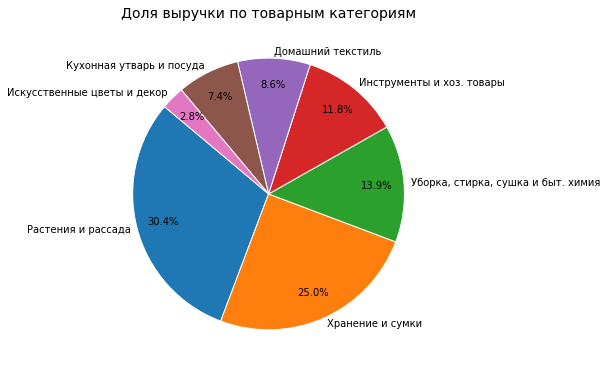

In [45]:
# размер графика
plt.figure(figsize=(8, 8))

plt.pie(
    cat_rev['category_revenue'],            # значения
    labels=cat_rev['category_product'],     # подписи с названиями категорий
    autopct='%1.1f%%',                      # вывод доли категории с одним десятичным
    startangle=140,                         # «повернуть» круг для более удобного чтения
    pctdistance=0.8,                        # вынос процента к середине сектора
    labeldistance=1.05,                     # вынос подписи‑категории чуть наружу
    wedgeprops=dict(edgecolor='white'),     # белые границы между секторами
)

plt.title('Доля выручки по товарным категориям', fontsize=14)
plt.tight_layout()
plt.show()


В ТОП-3 категорий по выручке входят:
- Растения и рассада 30,4%,
- Хранение и сумки 25.0%,
- Уборка, стирка, сушка и быт. химия 13,9%

Меньше всего выручка в категории Искусственные цветы и декор 2,8%.

**2. ТОП-категорий по количеству товара в заказе.**

In [46]:
# 3. Суммарное КОЛИЧЕСТВО проданных единиц в каждой категории
cat_qty = (
    df_filtered
      .groupby('category_product', as_index=False)        # группируем по категории
      .agg(category_qty=('quantity', 'sum'))              # суммируем поле quantity
      .sort_values('category_qty', ascending=False)       # сортируем от большего к меньшему
)

cat_qty.head()   # при желании вывести таблицу


,category_product,category_qty
4,Растения и рассада,5587
1,Инструменты и хоз. товары,2019
2,Искусственные цветы и декор,1699
5,"Уборка, стирка, сушка и быт. химия",1153
3,Кухонная утварь и посуда,1127


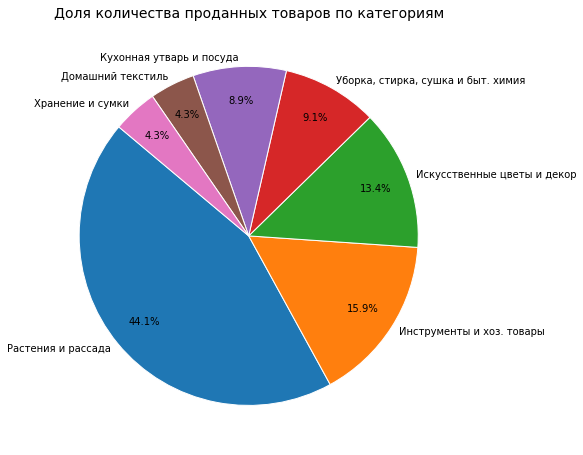

In [47]:
# Диаграмма: доля ПРОДАЖ (штук) по товарным категориям
plt.figure(figsize=(8, 8))

plt.pie(
    cat_qty['category_qty'],            # «кусочки» – суммарное кол‑во штук
    labels=cat_qty['category_product'], # подписи с названиями категорий
    autopct='%1.1f%%',                  # подпись‑процент с одной цифрой после запятой
    startangle=140,                     # поворачиваем диаграмму для лучшей читаемости
    pctdistance=0.8,                    # позиция процента (ближе к центру сектора)
    labeldistance=1.05,                 # позиция подписи‑категории (слегка наружу)
    wedgeprops=dict(edgecolor='white')  # белые границы между секторами
)

plt.title('Доля количества проданных товаров по категориям', fontsize=14)
plt.tight_layout()
plt.show()


В ТОП-3 категорий по количеству товаров в заказе:
- Растения и рассада 44,1%,
- Инструменты и хоз. товары 15,9%,
- Искусственные цветы и декор 13,4%

Меньше всего выручка в категории Хранение и сумки 4,3%.

#### Сезонные пики (по месяцам).

In [48]:
# агрегируем: сколько продано и выручка
cat_month = (
    df_filtered
      .groupby(['order_month', 'category_product'], as_index=False)
      .agg(month_qty   = ('quantity', 'sum'), # сум-ое кол-во ед товара, проданное за весь период
           month_rev   = ('revenue',  'sum')) # суммарная выручка
)

# порядковый месяц_текста для подписей
#cat_month['month_label'] = pd.to_datetime(cat_month['order_month']).dt.strftime('%Y‑%m')

cat_month.head()

,order_month,category_product,month_qty,month_rev
0,2018-10,Домашний текстиль,37,22625.000
1,2018-10,Инструменты и хоз. товары,361,47539.000
2,2018-10,Искусственные цветы и декор,70,3742.000
3,2018-10,Кухонная утварь и посуда,82,23728.000
4,2018-10,Растения и рассада,451,76541.000


Построю тепловую карту, что бы проанализировать сезонность выручки по месяцам.

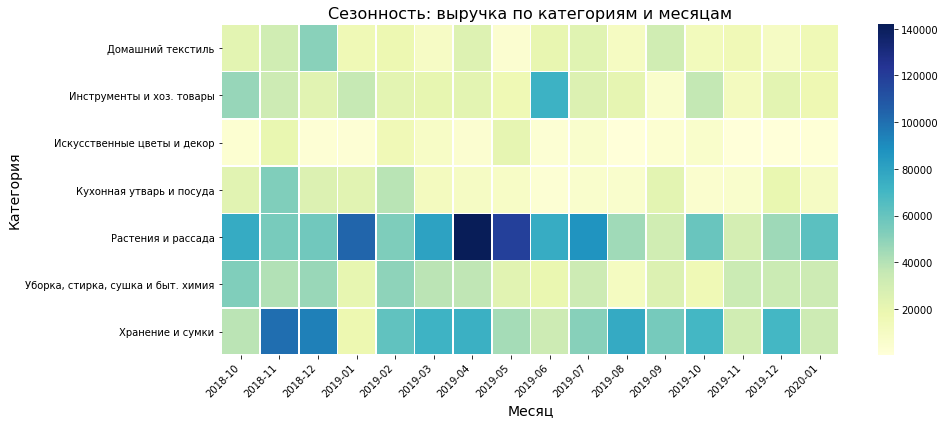

In [49]:
pivot_rev = cat_month.pivot(index='category_product',
                            columns='order_month',
                            values='month_rev')

plt.figure(figsize=(14, 6))
sns.heatmap(pivot_rev,
            cmap='YlGnBu',
            linewidths=.5,
            fmt='.0f')
plt.title('Сезонность: выручка по категориям и месяцам', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Категория', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


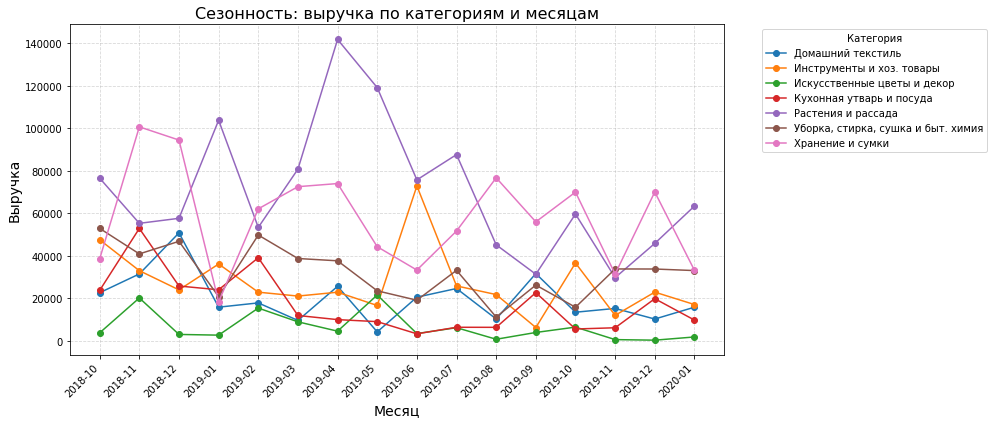

In [50]:
plt.figure(figsize=(14, 6))

# Построим линии по строкам (категориям)
for category in pivot_rev.index:
    plt.plot(pivot_rev.columns, pivot_rev.loc[category], marker='o', label=category)

plt.title('Сезонность: выручка по категориям и месяцам', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Выручка', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Категория', bbox_to_anchor=(1.05, 1), loc='upper left')  # Легенда сбоку
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Анализ графиков "Сезонность: выручка по категориям и месяцам" показывает:**
- *Домашний текстиль:* показывает увеличенную выручку в осенне-зимней пириод.
- *Инструменты и хоз. товары:* в начале лета и осенний период.
- *Искусственные цветы и декор:* каких-то сильных всплесков выручки не наблюдается, за весь анализируемый период выручка достаточно стабильная.
- *Кухонная утварь и посуда:* показывает увеличенную выручку в осенне‑зимний сезон.
- *Растения и рассади:* сезонность явно выражена - весна (март, апрель, май) и осень, но в меньшей степени.
- *Уборка, стирка, сушка и быт. химия:* показывает чуть более увеличенную выручку в осенне-зимней период.
- *Хранение и сумки:* тоже прослеживается сезонность - конец лета и начало осени, весна - март, апрель.

Далее посмотрю на количество проданных товаров по категориям в динамике по месяцам.

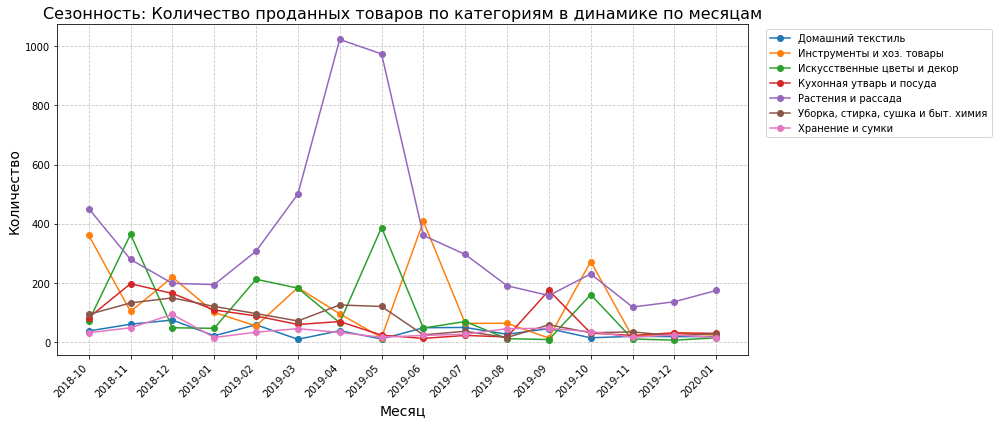

In [51]:
plt.figure(figsize=(14,6))
for cat, grp in cat_month.groupby('category_product'):
    plt.plot(grp['order_month'], grp['month_qty'], marker='o', label=cat)

plt.legend(bbox_to_anchor=(1.02,1), loc='upper left')
plt.title('Сезонность: Количество проданных товаров по категориям в динамике по месяцам', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


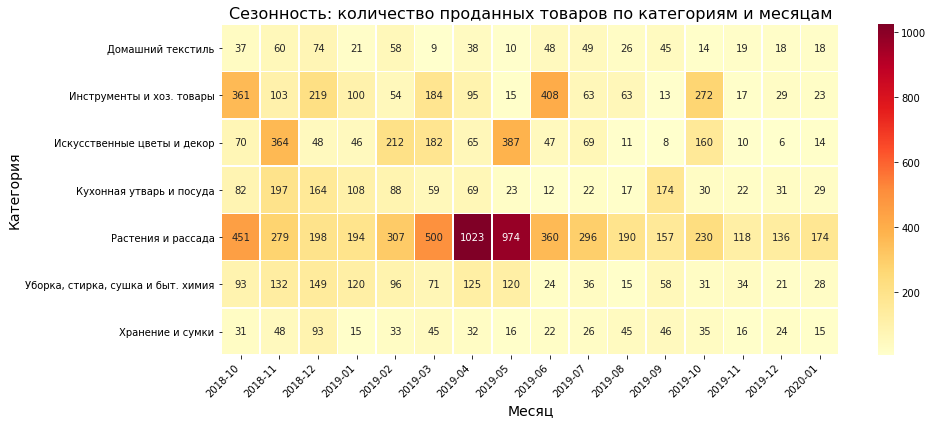

In [52]:
# Сводная таблица: категории — строки, месяцы — столбцы, значения — количество
pivot_qty = cat_month.pivot(index='category_product',
                            columns='order_month',
                            values='month_qty')

# Визуализация: тепловая карта
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_qty,
            cmap='YlOrRd',
            linewidths=0.5,
            fmt='.0f',
            annot=True)  # можно убрать, если не нужны цифры на клетках

plt.title('Сезонность: количество проданных товаров по категориям и месяцам', fontsize=16)
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Категория', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Анализ графиков "Сезонность: Количество проданных товаров по категориям в динамике по месяцам" показывает:** cильная сезонность прослеживается только у Растений и рассады: почти весь годовой объём штучных продаж формируется март-май и октябрь.

Далее расчитаю и проведу анализ **коэффициента сезонности ('season_index')**, он показывает, во сколько раз выручка категории в конкретный месяц выше или ниже её собственного среднемесячного уровня.

**Расчитаю его так:** 'season_index = month_rev / avg_cat_rev', где *month_rev* — выручка данной категории именно в этот месяц, а *avg_cat_rev* — средняя месячная выручка той же категории за весь период.

**Значения коэффициента:**
- ≈ 1,00 - месяц на уровне среднего значения,
- больше (>) 1,00 - выше среднего значения,
- меньше (<) 1,00 - ниже среднего значения.

In [53]:
# среднее по категории
avg_cat = cat_month.groupby('category_product')['month_rev'].transform('mean')
cat_month['season_index'] = cat_month['month_rev'] / avg_cat

# берём сильные пики
peaks = cat_month[cat_month['season_index'] > 1.3]       # порог можно менять
peaks = peaks.sort_values(['category_product','season_index'], ascending=[True,False])

print("Сильные сезонные пики (>30% выше среднего):")
display(peaks[['category_product','order_month','month_rev','season_index']])


Сильные сезонные пики (>30% выше среднего):


,category_product,order_month,month_rev,season_index
14,Домашний текстиль,2018-12,50790.000,2.542
77,Домашний текстиль,2019-09,31638.000,1.584
7,Домашний текстиль,2018-11,31457.000,1.575
57,Инструменты и хоз. товары,2019-06,72873.000,2.654
1,Инструменты и хоз. товары,2018-10,47539.000,1.732
85,Инструменты и хоз. товары,2019-10,36605.000,1.333
22,Инструменты и хоз. товары,2019-01,36133.000,1.316
51,Искусственные цветы и декор,2019-05,21542.000,3.342
9,Искусственные цветы и декор,2018-11,20149.000,3.126
30,Искусственные цветы и декор,2019-02,15395.000,2.388


**Выводыи из анализа индекса сезонности по категориям:**
1. Почти все категории усиливаются в «переходные» месяцы — октябрь и декабрь (подготовка к зиме и праздникам).
2. Подробнее по категориям, когда самый высокий индекс:
- Домашний текстиль - декабрь
- Инструменты и хоз. товары - июнь
- Искусственные цветы и декор - май, ноябрь
- Кухонная утварь и посуда - ноябрь, февраль
- Растения и рассада - апрель
- Уборка, стирка, сушка и быт. химия - октябрь
- Хранение и сумки - ноябрь.

#### Выводы по анализу покупателей.

**Выполненые шаги:**
- анализ ТОП-категорий по выручке и количеству товаров.
- анализ сезонных пиков (по месяцам) по категориям.

**Консолидированный вывод:**
1. Продажи крайне сегментированы. Оборот и объём штучных продаж концентрируются в двух‑трёх категориях, главным драйвером остаётся «Растения и рассада».

2. Ярко выраженная сезонность.
- Весна (апрель–май) — пик Растений и рассады .
- Октябрь–декабрь — универсальный подъём почти всех категорий (подготовка к зиме, подарки, праздники).
- Май — сильный месяц для Искусственных цветов и декора (садовые мероприятия, свадьбы).

3. Тактические действия:
- планировать запасы, маркетинговые бюджеты и персонал согласно месяцам с индексом сезонности (season_index) > 1,5;
- Запускать сезонные промо‑кампании:
    - апрель — растения;
    - май — декор;
    - декабрь — текстиль, посуда, хранение.

### Временной анализ.
**Цель анализа:** Понять, когда и как пользователи делают заказы:
- распределение активности во времени,
- наличие пиков (праздники, акции).

#### Распределение числа заказов и выручки по месяцам.

In [54]:
# Группируем по order_month
monthly_stats = (
    df_filtered.groupby('order_month')
    .agg({'order_id': 'nunique', 'revenue': 'sum'})
    .rename(columns={'order_id': 'unique_orders'})
    .reset_index()
)

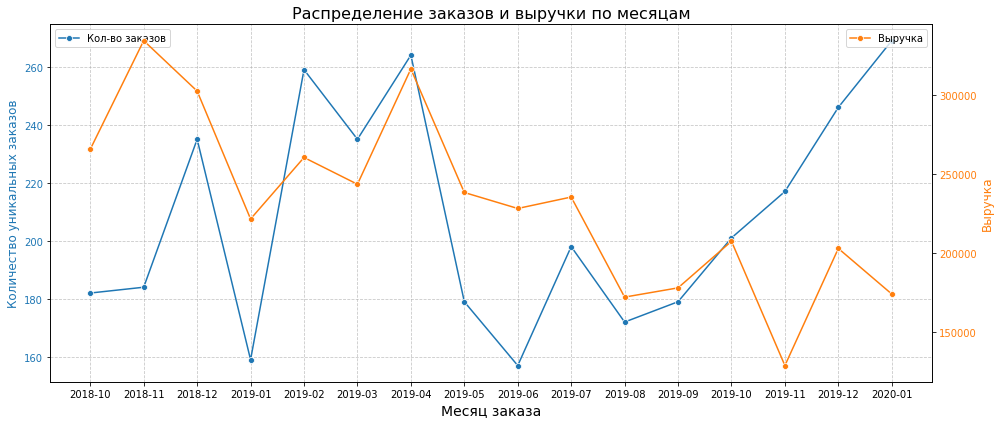

In [55]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Первая ось Y — количество заказов
sns.lineplot(data=monthly_stats, x='order_month', y='unique_orders', marker='o',
             label='Кол-во заказов', ax=ax1, color='tab:blue')
ax1.set_ylabel('Количество уникальных заказов', fontsize=12, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Вторая ось Y — выручка
ax2 = ax1.twinx()
sns.lineplot(data=monthly_stats, x='order_month', y='revenue', marker='o',
             label='Выручка', ax=ax2, color='tab:orange')
ax2.set_ylabel('Выручка', fontsize=12, color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# оформление
ax1.set_title('Распределение заказов и выручки по месяцам', fontsize=16)
ax1.set_xlabel('Месяц заказа', fontsize=14)

plt.xticks(rotation=45)
ax1.grid(True, linestyle='--', alpha=0.7)
fig.tight_layout()
plt.show()


**Анализ графика "Распределения заказов и выручки по месяцам":**
1. Видно, что примерно с 12-2018 по 10-2019 распределение количества заказов и выручки примерно идет в одном темпе, т.е. увеличивается количество заказов - увеличивается выручка; уменьшается количество закзов - уменьшаяется выручка.
2. По графику прослеживаются логичные пики роста продаж и выручки в праздничные и сезонные месяца - декабрь, февраль, апрель, октябрь. И сезонное снижение - ноябрь, январь, июнь.
3. Интересное распределение наблюдается с 10-2019 - количество заказов растет, а выручка сильно падает. Возможые причины этого явления:
    1. снижене среднего чека:
    - пользователи стали чаще заказывать, но — более дешёвые товары,
    - могли быть скидки, распродажи, промо-акции → рост заказов, но меньшая выручка с каждого;
    2. изменение ассортимента- в продаже доминировали товары из более дешёвых категорий;
    3. Изменение целевой аудитории - привлекли новых клиентов, которые склонны покупать меньше или дешевле.
   
Посмотрю более подробно распределение среднего чека по месяцам.

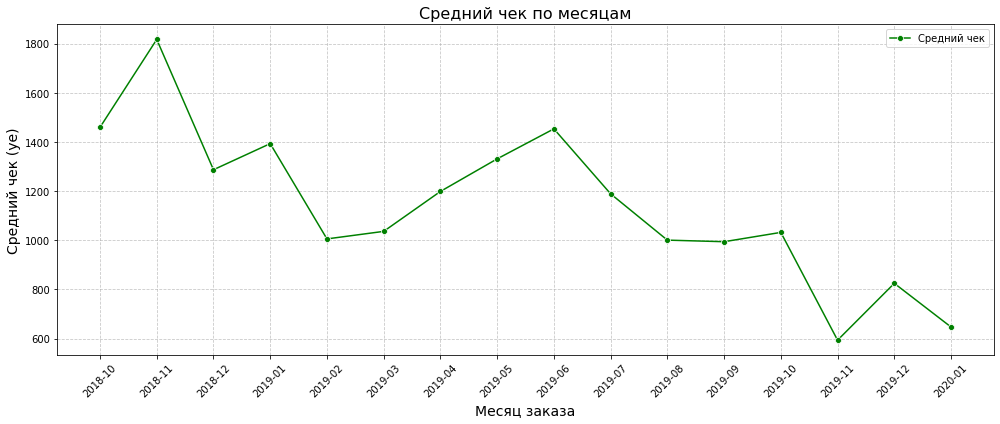

In [56]:
# расчет среднего чека
monthly_stats['avg_check'] = monthly_stats['revenue'] / monthly_stats['unique_orders']

# Визуализация
plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_stats, x='order_month', y='avg_check', marker='o', color='green', label='Средний чек')

plt.title('Средний чек по месяцам', fontsize=16)
plt.xlabel('Месяц заказа', fontsize=14)
plt.ylabel('Средний чек (уе)', fontsize=14)

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


Действительно, с октября по ноябрь 2019 наблюдается резкое снижение среднего чека. И в принципе наблюдается общее снижение среднего чека.

#### Распределение среднего числа заказов и выручки по дням недели.

In [57]:
# Группировка: среднее число заказов и средняя выручка по дню недели
dow_stats = (
    df_filtered.groupby('day_of_week')
    .agg({'order_id': 'nunique', 'revenue': 'mean'})
    .rename(columns={
        'order_id': 'Среднее число заказов',
        'revenue': 'Средняя выручка'
    })
    .reset_index()
)

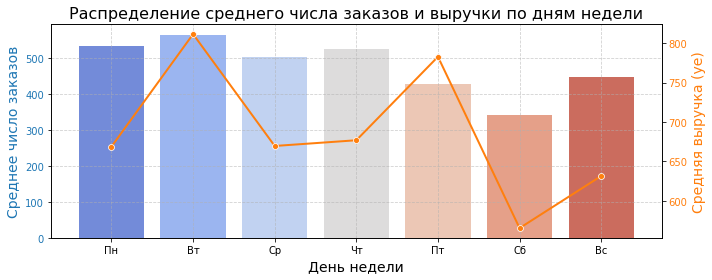

In [58]:
# Русские названия дней недели
days_labels_ru = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']

# Визуализация с двумя осями
fig, ax1 = plt.subplots(figsize=(10, 4))

# Ось 1 — среднее число заказов
color1 = 'tab:blue'
sns.barplot(data=dow_stats, x='day_of_week', y='Среднее число заказов', ax=ax1, palette='coolwarm')
ax1.set_ylabel('Среднее число заказов', fontsize=14, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xlabel('День недели', fontsize=14)
ax1.set_title('Распределение среднего числа заказов и выручки по дням недели', fontsize=16)
ax1.set_xticklabels(days_labels_ru, rotation=0)

# Ось 2 — средняя выручка
ax2 = ax1.twinx()
color2 = 'tab:orange'
sns.lineplot(data=dow_stats, x='day_of_week', y='Средняя выручка', ax=ax2,
             color=color2, marker='o', linewidth=2)
ax2.set_ylabel('Средняя выручка (уе)', fontsize=14, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

# Оформление
ax1.grid(True, linestyle='--', alpha=0.6)
fig.tight_layout()
plt.show()


**Анализ графика "Распределения среднего числа заказов и выручки по дням неделям":**
1. Покупательская активность: в начале недели - понедельник и вторник (пик), далее идет снижение покупательской активности до субботы (минимальное число заказов), в восресенье число заказов снова растет.
2. Выручка: наибольшая выручка во вторник и пятницу; в начале недели выручка низкая, во вторник - пиковое значение, далее снижение и снова рост в понедельник, а в субботу резкий спад (минимальная выручка).
3. Резкое расхождение в темпе распределения числа заказов и выручки: в понедельник, субботу и воскресенье число заказов высоко, а выручка низкая, вероятнее всего покупают много дешевых товаров или есть дополнительные скидка; в пятницу  - число заказов меньше, а выручка высокая (имеет пиковые значения), скорее всего в эти дни приобретают более дорогой товар.

Посмотрю на распределение среднего чека по дням неделям.

In [59]:
# Сводная для подсчета среднего чека
dow_avg_check = (
    df_filtered.groupby('day_of_week')
    .agg({'revenue': 'sum', 'order_id': 'nunique'})
    .reset_index()
)

# Подсчет среднего чека
dow_avg_check['avg_check'] = dow_avg_check['revenue'] / dow_avg_check['order_id']


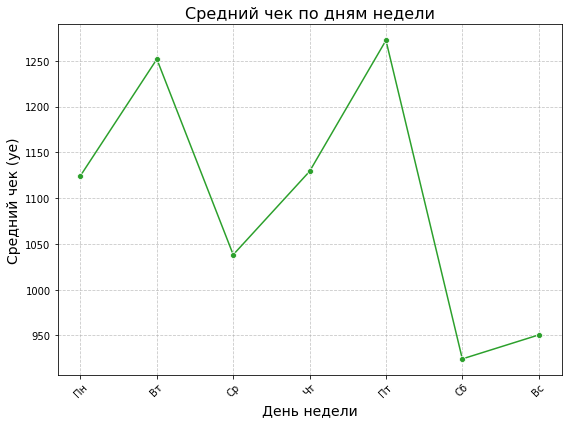

In [60]:
# Русские названия дней недели
days_labels_ru = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']

# визуализация
plt.figure(figsize=(8, 6))
sns.lineplot(data=dow_avg_check.sort_values('day_of_week'), x='day_of_week', y='avg_check', marker='o', color='tab:green')

# Настройки графика
plt.title('Средний чек по дням недели', fontsize=16)
plt.xlabel('День недели', fontsize=14)
plt.ylabel('Средний чек (уе)', fontsize=14)
plt.xticks(ticks=range(7), labels=days_labels_ru, rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Наибольший средний чек в субботу и воскресенье, так же наблюдается резкое падение среднего чека в среду и субботу; и резкий рост во вторник и пятницу.

#### Вывод по временному анализу.

**На этом этапе проведен анализ покупательской активности и средний чек в разрезе по:**
- месяцам (выручка и количество заказов, средний чек),
- дням недели (выручка и количество заказов, средний чек).

**Консолидированный вывод:**
1. Анализ динамики заказов, выручки и среднего чека по времени показал ярко выраженную сезонность и закономерности покупательского поведения.
2. Временной анализ выявил ключевые особенности поведения пользователей:
- поведение зависит как от календарного месяца (праздничные/сезонные пики), так и от дня недели (рабочие/выходные);
- с октября 2019 года активность пользователей изменилась: заказы участились, но стали дешевле — возможно, из-за маркетинговых стратегий или изменения пользовательского состава.

Эти наблюдения помогут скорректировать стратегию акций, ценообразования и рекламы: например, стимулировать покупки в периоды спада и усиливать промо в дни высокой покупательской активности.

### Анализ корреляции.
**Цель:** выявить взаимосвязи между количественными признаками, понять какие переменные "двигаются вместе".

**Посмотрю на:**
- связь между количеством товаров и ценой;
- связь между выручкой и количеством заказов.

#### Связь между количеством товаров и ценой.

Посмотрю на эту связь, для того, что бы понять:
- покупательское поведение,
- оценить, чувствительны ли клиенты к цене: уменьшают ли они количество товаров при росте цены.

In [61]:
# Анализ корреляции между количеством товара и его ценой
correlation_qty_price = df_filtered['quantity'].corr(df_filtered['price'])
print(f'Коэффициент корреляции между количеством и ценой: {correlation_qty_price:.2f}')


Коэффициент корреляции между количеством и ценой: -0.06


Коэффициент корреляции между количеством товара и ценой -0.06 показывает на слабую отрицательную зависимость, т.е. обратная корреляция - чем выше цена — тем меньше берут.

Посмотрю распределение на диаграмме рассеяния.

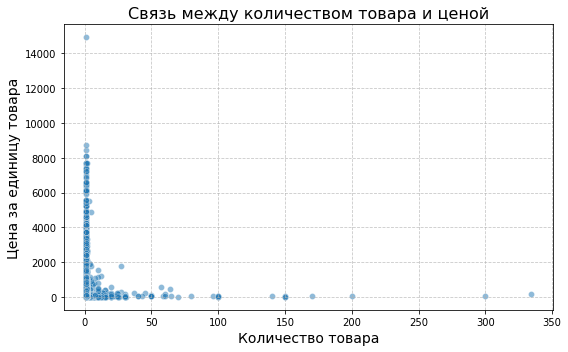

In [62]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_filtered, x='quantity', y='price', alpha=0.5)
plt.title('Связь между количеством товара и ценой', fontsize=16)
plt.xlabel('Количество товара', fontsize=14)
plt.ylabel('Цена за единицу товара', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


График подтверждает незначительную обратную зависимость между ценой товара и его количеством в заказе, т.е. чем цена выше, тем количество товаров в заказе меньше.

Расмотрю эту зависимость в разбивке по категориям товаров.

In [63]:
# Группируем данные по категории товара и рассчитываем корреляцию
correlations = df_filtered.groupby('category_product').apply(
    lambda x: x['quantity'].corr(x['price'])
).reset_index(name='correlation_qty_price')


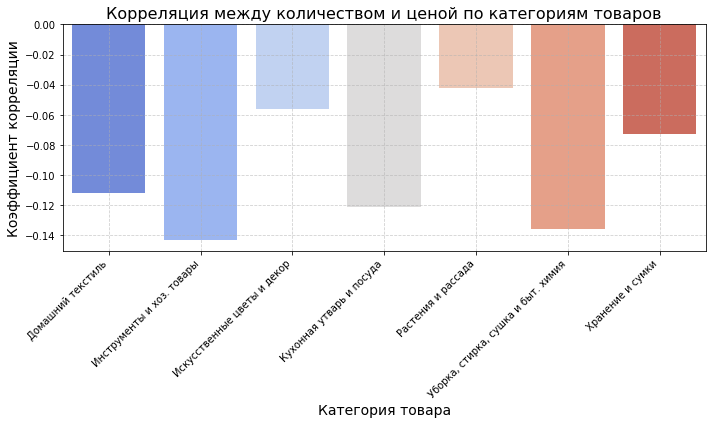

In [64]:
# Создаём график
plt.figure(figsize=(10, 6))
sns.barplot(x='category_product', y='correlation_qty_price', data=correlations, palette='coolwarm')

# Настроим отображение графика
plt.title('Корреляция между количеством и ценой по категориям товаров', fontsize=16)
plt.xlabel('Категория товара', fontsize=14)
plt.ylabel('Коэффициент корреляции', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Показываем график
plt.show()


Видно, что в наибольшей степенеи обратная корреляция (т.е. зависимость сильнее) прослеживатеся для категорий: Уборка, стирка, сушка и быт. химия (-0,13), Инструменты и хоз. товары (коэф кор -0.15).

И очень слабая зависимость для категорий: Растения и рассада (коэф кор - 0.04), Искусственные цветы и декор (коэф кор - 0.05).

#### Связь между выручкой и количеством заказов.

Посмотрю на эту связь, для того, что бы понять, на сколько влияет количество заказов на выручку, и есть ли эта зависимость.

In [65]:
# Агрегация по дате или месяцу (выбери нужное)
orders_revenue_daily = (
    df_filtered.groupby('date')
    .agg(
        num_orders=('order_id', 'nunique'),
        total_revenue=('revenue', 'sum')
    )
    .reset_index()
)

# Корреляция между числом заказов и выручкой
correlation_orders_revenue = orders_revenue_daily['num_orders'].corr(orders_revenue_daily['total_revenue'])
print(f'Коэффициент корреляции между количеством заказов и выручкой: {correlation_orders_revenue:.2f}')


Коэффициент корреляции между количеством заказов и выручкой: 0.50


Коэффециент корреляции между количеством заказов и выручкой 0.50 указывает на прямую зависимость числа заказов и выручки (т.е. чем больше заказов, тем выше выручка). но эта зависимость не сильная.

Посмотрю распределение на диаграмме рассеяния.

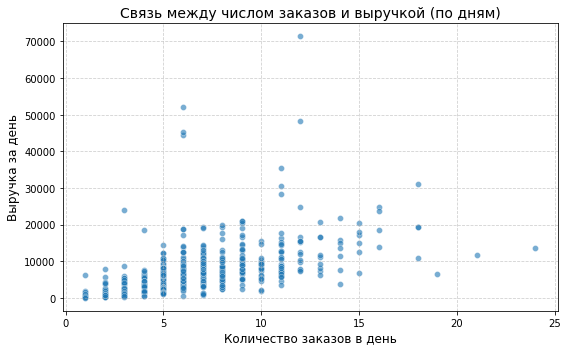

In [66]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=orders_revenue_daily, x='num_orders', y='total_revenue', alpha=0.6)
plt.title('Связь между числом заказов и выручкой (по дням)', fontsize=14)
plt.xlabel('Количество заказов в день', fontsize=12)
plt.ylabel('Выручка за день', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


График подтверждает прямую зависимость числа заказов и выручки.

Рассмотрю коэффициент корреляции для каждой категории в отдельности.

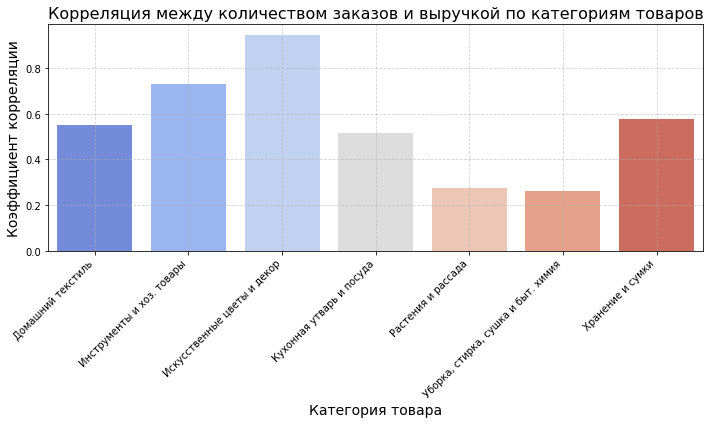

In [67]:
# Группируем данные по категории товара и считаем сумму выручки и количество уникальных заказов
correlation_data = df_filtered.groupby('category_product').agg(
    revenue_sum=('revenue', 'sum'),
    unique_orders_count=('order_id', 'nunique')
).reset_index()

# Вычисляем коэффициент корреляции между выручкой и количеством заказов для каждой категории
correlation_values = []
categories_to_include = []

for category in correlation_data['category_product']:
    category_data = df_filtered[df_filtered['category_product'] == category]
    
    if len(category_data) > 1:  # Проверяем, что в категории больше одного заказа
        correlation = category_data['revenue'].corr(category_data['quantity'])
        correlation_values.append(correlation)
        categories_to_include.append(category)
    else:
        # Для категорий с недостаточными данными (менее 2 заказов), присваиваем NaN
        correlation_values.append(np.nan)
        categories_to_include.append(category)

# Добавляем рассчитанные коэффициенты корреляции в DataFrame
correlation_data['correlation_qty_revenue'] = correlation_values

# Фильтруем DataFrame, исключая категории с NaN значениями корреляции
correlation_data = correlation_data.dropna(subset=['correlation_qty_revenue'])

# Создаём график столбчатой диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(x='category_product', y='correlation_qty_revenue', data=correlation_data, palette='coolwarm')

# Настроим отображение графика
plt.title('Корреляция между количеством заказов и выручкой по категориям товаров', fontsize=16)
plt.xlabel('Категория товара', fontsize=14)
plt.ylabel('Коэффициент корреляции', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Показываем график
plt.show()


График распределения коэффициента корреляции по категориям показывает, что:
- в наибольшей степени прямая зависимость выражена у категорий Искусственные цветы и декор (0.9), Инструменты и хоз. товары (0.7);
- в наименьшей степени выражена для категории: Уборка, стирка, сушка и быт. химия (0.3).

#### Вывод по анализу корреляции.
**На этом этапе проведен анализ связи:**
- между количеством товаров и ценой;
- между выручкой и количеством заказов.

**Консолидированный вывод:**
1. ***Связь между количеством товаров и ценой.***
Зависимость количества товара от цены варьируется по категориям — это важно учитывать при разработке ценовой политики.
- общая корреляция -0.06 - слабая обратная зависимость: чем выше цена товара, тем меньше его заказывают;
- корреляция по категориям:
    - наибольшая чувствительность к цене: Уборка, стирка, сушка и быт. химия (-0,13), Инструменты и хоз. товары (коэф кор -0.15),
    - наименьшая чувствительность: Растения и рассада (коэф кор - 0.04), Искусственные цветы и декор (коэф кор - 0.05)
- Рекомендации:
    - в этих сегментах внимательно отслеживать ценовую эластичность и проводить A/B-тесты при изменении цены,
    - рассмотреть возможность введения программ лояльности или скидок на товары с наиболее выраженной обратной корреляцией.


2. ***Связь между выручкой и количеством заказов.***
Выручка в большинстве категорий зависит от количества заказов, однако в некоторых сегментах важнее средний чек, а не количество.
- общая корреляция: 0.50 - умеренно сильная прямая зависимость: больше заказов - выше выручка;
- корреляция по категориям:
    - сильнее всего зависимость выражена у: Искусственные цветы и декор (0.9), Инструменты и хоз. товары (0.7),
    - слабая зависимость: Уборка, стирка, сушка и быт. химия (0.3).
- Рекомендации:
    - для категорий с высокой корреляцией стоит активно масштабировать продажи — через акции, продвижение и расширение ассортимента.
    - в категориях с низкой корреляцией — оценить структуру чека и товарный микс, возможно, стоит повысить средний чек за счёт сопутствующих товаров или упаковки в наборы.

### Консолидированный вывод по исследовательскому анализу.
**В исследовательском анализе проведена работа по следующим направлениям:**
1. **Общий обзор:**
- общий анализ статистических данных всего датафрейма (выявить: количество уникальных покупателей, заказов, товаров; временной охват данных);
- посмотреть распределение заказов по месяцам;
- посмотреть распределение количества товаров в заказах.

2. **Анализ данных на аномалии и выбросы.**
- проверка на выбросы по количеству (quantity);
- аномалии по датам (date);
- аномальные значения выручки (revenue);
- проверка аномальных значений по количеству заказов на покупателя.

3. **Анализ покупателей:**
- топ-20 товаров по выручке и количеству;
- сезонные пики (по месяцам).

4. **Временной анализ:**
- распределение заказов по годам/месяцам;
- праздничные пики, акции.

5. **Корреляция:**
- связь между количеством товаров и ценой;
- связь между выручкой и количеством заказов.

**Выводы.**
1. ***Общий обзор***

*Анализ статистических данных:*
1. 'date' (дата заказа)
- в датафрейме предсталены данные за период с 01.10.2018 года по 31.01.2020 года,
- самая часто встречающаяся дата 24.04.2019 (встречается в 85 строках).

2. 'order_month' (месяц заказа)
- чаще всего заказы делали в мае 2019 года, этот месяц встречается в данных 737 раз.

3. 'product' (наименование товра) 
- представлено 2340 уникальных позиций,
- наиболее популярный товар "пеларгония розебудная red pandora укорененный черенок", встречается 67 раз.

4. 'quantity' (количество товара в заказе)
- min количество 1, max количество 1000,
- среднее значение 2,6 товаров в заказе, медианное значение 1 товар в заказе,
- стандартное отклонение довольно велико 16,4, что указывает на большую вариативность и возможные выбросы,
- 75% заказов имеют только 1 товар.

5. 'price' (цена товара)
- min 9 уе, max 14917 уе,
- среднее значение 530 уе, медианное значение 150 уе,
- стандартное отклонение 971 довольно большое, что указывает на большую вариативность денных и возможные выбросы,
- 25% товаров менее 90 уе, 50% менее 150 уе, 75% менее 524 уе.

*Распределения заказов по месяцам:*
1. Наибольшее количество заказов было оформлено в мае 2019 (737) и апреле 2019 (677), а так же в октябре 2018 (484) и ноябре 2018 (428); остальные месяца значительно отстают.
2. Общая тенденция распределения заказов
- с октября 2018 по январь 2019 (включительно) наблюдается снижение количества заказов,
- с февраля по май 2019 - рост числа заказов,
- далее с июня 2019 виден значительный спад,
- с августа 2019 года график стабилизируется, только в январе 2020 наблюдается небольшой рост.
3. Разница с самым лучшим месяцем - май 2019 и самым худшим месяцем - январь 2019 составляет 75%.

*Распределение количества товаров в заказе:*
1. Большая часть заказов имеет только по одному товару (69%)
2. Доля заказов имеющих до 10 товаров 93%
3. Так же на массштабированно графике видно, что после 200 товаров в заказе, вероятние всего заказы с количеством товаров боле 200 - это выбросы.

***Анализ на аномалии и выбросы.***

1. *Выбросы по количеству товаров в заказе.*
- В данных есть экстримальные выбросы по количеству товаров в заказе.
- Данные по перцентилям, говорят о том, что:
    - 95-й перцентиль: 6.0 - не более 5% заказов имеют более 6 товаров,
    - 99-й перцентиль: 30.0 - не более 1% заказов имеют более 30 товаров.
- Удалять закзы по 95-му или 99-му не целесообразно, т.к. можно отсечь потенциальных оптовиков.
- Анализ ТОП-15 заказов по количеству товаров показал, что заказ на 1000 вантузов вероятнее всего выброс, удалила эти данные из анализа.

2. ***Аномалии по дате заказов.***
- В рамках этого шага выполнено:
    - просмотр дат анализируемого периода,
    - выделены из даты номер дня недели в новое поле 'day_of_week',
    - посчитана частота заказов по дням недели за весь рассматриваемый период,
    - оценено распределение среднего количества заказываемых товаров по дням недели.
- В частоте заказов и среднем распределения товаров в заказе по дням неделям не обнаружено аномалий.

3. ***Аномальные значения выручки.***
-  В данных по выручке за заказ есть выбросы.
- Данные по перцентилям, говорят о том, что:
    - 95-й перцентиль: 1649.0 - не более 5% заказов имеют выручку выше 2849 уе
    - 99-й перцентиль: 2527.0 - не более 1% заказов имеют выручку выше 6148 уе.
- Аналз ТОП-15 заказов по выручке не выявил аномалий, которые требуется удалить из анализа.

4. ***Аномалии по количеству заказов на 1-го покупателя.***
- В данных по количеству заказов на покупателя есть выбросы.
- Данные по перцентилям, говорят о том, что:
    - 95-й перцентиль: 2 - не более 5% покупателей имеют больше 2-х заказов,
    - 99-й перцентиль: 3 - не более 1% покупателей имеют больше 3-х заказов.
- Аналз ТОП-15 покупателей по количеству заказов показал, что сильно выделяется покупатели с количеством заказов 126 и 35, вероятнее всего это выброс, удалила данные с этим покупателем из дальнейшего анализа.

5. Далее для анализа отфильтровала данные в новый датафрейм df_filtered, из которого удалены все обнаруженные выбросы и аномалии. Датафрейм df_filtered имеет 5355 строк и 10 полей, т.е. удалено 189 строки (3,4%) с аномальными данными и выбросами.

***Анализ покупателей.***
1. Продажи крайне сегментированы. Оборот и объём штучных продаж концентрируются в двух‑трёх категориях, главным драйвером остаётся «Растения и рассада».

2. Ярко выраженная сезонность.
- Весна (апрель–май) — пик Растений и рассады .
- Октябрь–декабрь — универсальный подъём почти всех категорий (подготовка к зиме, подарки, праздники).
- Май — сильный месяц для Искусственных цветов и декора (садовые мероприятия, свадьбы).

3. Тактические действия:
- планировать запасы, маркетинговые бюджеты и персонал согласно месяцам с индексом сезонности (season_index) > 1,5;
- Запускать сезонные промо‑кампании:
    - апрель — растения;
    - май — декор;
    - декабрь — текстиль, посуда, хранение.
    
***Временной анализ.***
1. Анализ динамики заказов, выручки и среднего чека по времени показал ярко выраженную сезонность и закономерности покупательского поведения.
2. Временной анализ выявил ключевые особенности поведения пользователей:
- поведение зависит как от календарного месяца (праздничные/сезонные пики), так и от дня недели (рабочие/выходные);
- с октября 2019 года активность пользователей изменилась: заказы участились, но стали дешевле — возможно, из-за маркетинговых стратегий или изменения пользовательского состава.

Эти наблюдения помогут скорректировать стратегию акций, ценообразования и рекламы: например, стимулировать покупки в периоды спада и усиливать промо в дни высокой покупательской активности.

***Анализ корреляции.***

1. ***Связь между количеством товаров и ценой.***
Зависимость количества товара от цены варьируется по категориям — это важно учитывать при разработке ценовой политики.
- общая корреляция -0.06 - слабая обратная зависимость: чем выше цена товара, тем меньше его заказывают;
- корреляция по категориям:
    - наибольшая чувствительность к цене: Уборка, стирка, сушка и быт. химия (-0,13), Инструменты и хоз. товары (коэф кор -0.15),
    - наименьшая чувствительность: Растения и рассада (коэф кор - 0.04), Искусственные цветы и декор (коэф кор - 0.05)
- Рекомендации:
    - в этих сегментах внимательно отслеживать ценовую эластичность и проводить A/B-тесты при изменении цены,
    - рассмотреть возможность введения программ лояльности или скидок на товары с наиболее выраженной обратной корреляцией.


2. ***Связь между выручкой и количеством заказов.***
Выручка в большинстве категорий зависит от количества заказов, однако в некоторых сегментах важнее средний чек, а не количество.
- общая корреляция: 0.50 - умеренно сильная прямая зависимость: больше заказов - выше выручка;
- корреляция по категориям:
    - сильнее всего зависимость выражена у: Искусственные цветы и декор (0.9), Инструменты и хоз. товары (0.7),
    - слабая зависимость: Уборка, стирка, сушка и быт. химия (0.3).
- Рекомендации:
    - для категорий с высокой корреляцией стоит активно масштабировать продажи — через акции, продвижение и расширение ассортимента.
    - в категориях с низкой корреляцией — оценить структуру чека и товарный микс, возможно, стоит повысить средний чек за счёт сопутствующих товаров или упаковки в наборы.

## Кластеризация покупателей.

### Формирование признаков для кластеризации.

*Агрегация по customer_id* (таблица, где каждая строка — один клиент, а столбцы — его поведенческие признаки):
- средний чек за заказ (общая выручка / количество заказов) - avg_check,
- среднее количество товаров в заказе - avg_quantity,
- средняя цена одного товара (общая выручка / общее количество товаров) - avg_price,
- количество заказов на покупателя - total_orders.

In [68]:
# Группировка данных по пользователям
df_features = df_filtered.groupby('customer_id').agg(
    total_revenue=('revenue', 'sum'),            # Общая выручка
    total_orders=('order_id', 'nunique'),        # Кол-во заказов
    total_quantity=('quantity', 'sum')           # Общее кол-во товаров
).reset_index()

# Вычисление признаков
df_features['avg_check'] = df_features['total_revenue'] / df_features['total_orders']       # Средний чек
df_features['avg_quantity'] = df_features['total_quantity'] / df_features['total_orders']   # Среднее кол-во товаров в заказе
df_features['avg_price'] = df_features['total_revenue'] / df_features['total_quantity']     # Средняя цена товара

# Оставляем только нужные колонки для кластеризации
df_features = df_features[['customer_id',
                           'avg_check', 'avg_price', 
                           'avg_quantity','total_orders']]

df_features.head()


,customer_id,avg_check,avg_price,avg_quantity,total_orders
0,000d6849-084e-4d9f-ac03-37174eaf60c4,555.000,138.750,4.000,1
1,001cee7f-0b29-4716-b202-0042213ab038,442.000,442.000,1.000,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,914.000,457.000,2.000,1
3,002d4d3a-4a59-406b-86ec-c3314357e498,1649.000,1649.000,1.000,1
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2324.000,1162.000,2.000,1


### Массштабирование признаков.
Нормализация данных через StandardScaler (приводим все числовые признаки к одному масштабу).

In [69]:
# Сохраняем customer_id отдельно, чтобы потом вернуть
customer_ids = df_features['customer_id']

# Отбираем числовые признаки для масштабирования
features_to_scale = df_features.drop(columns='customer_id')

# Масштабируем
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_to_scale)

# Преобразуем обратно в DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=features_to_scale.columns)
df_scaled['customer_id'] = customer_ids.values


### Кластеризация методом KMeans.
- определение числа кластеров;
- обучение модели KMeans;
- добавление метки cluster к каждому покупателю;
- визуализация результатов.

#### Определение числа кластеров.
Сначала определю оптимальное число кластеров с помощью метода локтя, опираясь на метрику inertia_ (внутрикластерная дисперсия).

На графике нужно найти «локоть» — точку, где снижение дисперсии замедляется. Обычно это и есть оптимальное число кластеров.

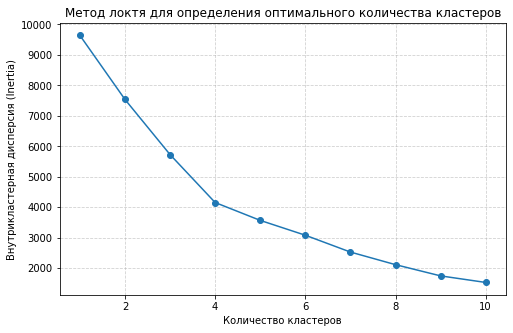

In [70]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled.drop(columns='customer_id'))
    inertia.append(kmeans.inertia_)

# Визуализация метода локтя
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Метод локтя для определения оптимального количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Внутрикластерная дисперсия (Inertia)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Снижение дисперсии замедляется примерно на 4-6, значит возможное количество кластеров - 4,5 или 6.

Так же посмотрю на дендограмму.

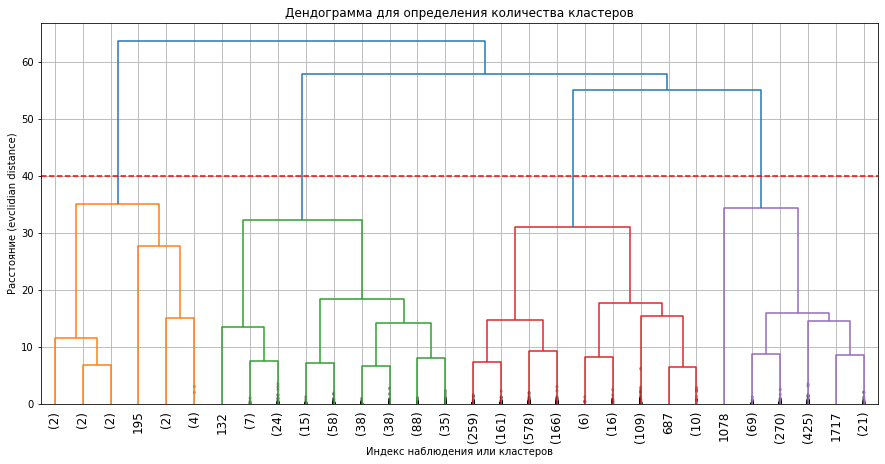

In [71]:
# Строим матрицу связей
linked = linkage(df_scaled.drop(columns='customer_id'), method='ward')

# Строим дендограмму
plt.figure(figsize=(15, 7))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Дендограмма для определения количества кластеров')
plt.xlabel('Индекс наблюдения или кластеров')
plt.ylabel('Расстояние (evclidian distance)')
plt.axhline(y=40, color='red', linestyle='--')  # Можно адаптировать значение y вручную
plt.grid(True)
plt.show()

**Анализ дендограммы:**
 Хорошая "высота разрыва" наблюдается примерно на уровне y= 40. Это тот уровень, где ещё видно чёткое разделение ветвей (кластеров), и после объединения их выше (при y > 40) начинается слияние существенно разных групп.
Горизонтальная линия на y = 40, разделяет 4 кластера — это количество крупных ветвей, пересекаемых этой линией.

Значит количество кластеров приму 4.

#### Обучение модели KMeans.
По графику локтя оптимальное значение кластеров — k=4. Обучу модель KMeans:

In [72]:
# Обучаем модель с выбранным числом кластеров
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled.drop(columns='customer_id'))
df_scaled['cluster'].unique()

array([0, 2, 1, 3], dtype=int32)

####  Объединение с оригинальными данными.
Добавлю кластерную метку к исходной таблице признаков:

In [73]:
# Добавляем метку к исходной таблице признаков
df_features['cluster'] = df_scaled['cluster']

df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   2410 non-null   object 
 1   avg_check     2410 non-null   float64
 2   avg_price     2410 non-null   float64
 3   avg_quantity  2410 non-null   float64
 4   total_orders  2410 non-null   int64  
 5   cluster       2410 non-null   int32  
dtypes: float64(3), int32(1), int64(1), object(1)
memory usage: 103.7+ KB


Посмотрю на данные получившихся кластеров.

In [74]:
# Сводная таблица по кластерам
cluster_summary = df_features.groupby('cluster').agg(
    cluster_size=('customer_id', 'nunique'),   # Число клиентов
    avg_price=('avg_price', 'mean'),
    avg_check=('avg_check', 'mean'),
    avg_quantity=('avg_quantity', 'mean'),    
    total_orders=('total_orders', 'mean')
).round(2)

# Переименование столбцов на русский язык
cluster_summary = cluster_summary.rename(columns={
    'cluster_size': 'Кол-во клиентов',
    'avg_check': 'Ср чек',
    'avg_quantity': 'Ср кол-во товаров',
    'avg_price': 'Ср цена товара',
    'total_orders': 'Кол-во заказов на клиента'
})

# Отображение результата
display(cluster_summary)


,Кол-во клиентов,Ср цена товара,Ср чек,Ср кол-во товаров,Кол-во заказов на клиента
cluster,,,,,
0,1412,422.670,920.730,5.390,1.000
1,810,607.770,695.130,1.610,2.060
2,178,3488.340,4408.110,1.820,1.350
3,10,176.320,18746.600,179.900,1.000


#### Визуализация результатов кластеризации.
Для визуализации в 2D используем понижение размерности с помощью PCA.
PCA (Principal Component Analysis) — это метод уменьшения размерности данных.
Он позволяет упростить многомерные данные, сохраняя при этом максимально важную информацию (разнообразие признаков).
PCA компонент 1 и PCA компонент 2 - это новые признаки, которые получаются путём линейного преобразования всех исходных признаков (avg_check, avg_quantity, и т.д.). Они не имеют прямого «реального» смысла, но несут в себе:
- PCA компонент 1 — объясняет максимальное возможное разнообразие в данных.
- PCA компонент 2 — объясняет второе по значимости направление разнообразия, независимое от первого.

Как это читать на графике:
- каждая точка — клиент;
- положение по осям PCA1 и PCA2 показывает его обобщённый поведенческий портрет, сформированный из всех признаков;
- близкие точки — похожие клиенты;
- удалённые точки — разные по поведению клиенты;
- кластеры на графике — это группы клиентов, похожих между собой, но отличающихся от других групп;

Для начала выведу матрицу весов компонентов PCA.

In [75]:
# Выбираем только признаки для PCA (без customer_id и cluster)
X = df_scaled.drop(columns=['customer_id', 'cluster'])

# Обучаем PCA
pca = PCA(n_components=2)
pca.fit(X)

# Названия признаков
feature_names = X.columns

# Сохраняем веса компонентов в датафрейм
pca_components = pd.DataFrame(
    pca.components_, 
    columns=feature_names,
    index=['PC1', 'PC2']
)

# Выводим таблицу
display(pca_components)


,avg_check,avg_price,avg_quantity,total_orders
PC1,0.733,0.416,0.520,-0.141
PC2,0.083,0.692,-0.544,0.467


**Анализ матрицы весов компонентов:**

***PC1 (первая компонента).***
1. "ценообразовательная компонента" (направление высоких затрат):
    - avg_check (0.733) — основной вклад: клиенты с более высокими чеками будут сильнее "видны" в этом компоненте;
    - avg_quantity (0.520) и avg_price (0.416) также вносят вклад, но меньше;
    - total_orders (-0.141) имеет слабый и отрицательный вклад — т.е. эта компонента не характеризует "частоту покупок", а скорее сумму среднего заказа и стоимость товаров.
2. PC1 дифференцирует пользователей по уровню трат за один заказ и средней стоимости товаров, слабо учитывая, как часто они покупают.

***PC2 (вторая компонента).***
1. "поведенческая компонента" (паттерн количества заказов):
    - avg_price (0.692) — важный фактор: дорогие товары,
    - total_orders (0.467) — также значим: частота покупок,
    - avg_quantity (-0.544) — сильный отрицательный вклад: клиенты, покупающие много товаров за заказ, "находятся" на противоположной стороне этой компоненты,
    - avg_check (0.083) — почти не влияет.
2. PC2 дифференцирует покупателей по поведению: часто ли они покупают, но немного (возможно, дорогие вещи) или редко, но много и, возможно, дешевле.

PC1 отражает разницу между клиентами с большими средними чеками и теми, кто тратит меньше. PC2 улавливает поведенческий паттерн: частые мелкие покупки дорогих товаров против редких крупных заказов.

Посмотрю на график визуализации результатов кластеризации.

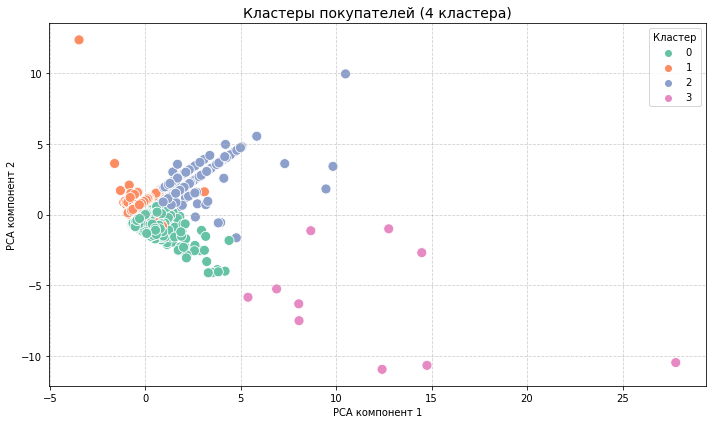

In [76]:
# Снижаем размерность до 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled.drop(columns=['customer_id', 'cluster']))

# Визуализация кластеров
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=pca_result[:, 0], 
    y=pca_result[:, 1],
    hue=df_scaled['cluster'], 
    palette='Set2',
    s=100
)
plt.title('Кластеры покупателей (4 кластера)', fontsize=14)
plt.xlabel('PCA компонент 1')
plt.ylabel('PCA компонент 2')
plt.legend(title='Кластер')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Анализ графика визуализации результата кластеризации.**
1. Ось x *PCA компонент 1* отвечает за различия по показателям, связанным с средним чеком и средней ценой. Ось y *PCA компонент 2* отражает различия в поведенческих характеристиках, таких как частота покупок и объём заказов.
2. ***Выводы по кластерам:***
- *Кластер 0* (бирюзовый, центр низ)
    - поведение пользователей среднестатистическое;
    - умеренный средний чек, умеренное количество заказов, покупают в среднем по несколько товаров;
    - это может быть основная пользовательская масса, на которую опирается бизнес.
- *Кластер 1* (оранжевый, слева)
    - низкий средний чек и цена товара,
    - высокая частота покупок, но, возможно, мало товаров за раз,
    - это могут быть частые покупатели, приобретающие дешёвые товары небольшими объёмами.
- *Кластер 2* (синий, центр верх)
    - средний или высокий чек,
    - могут покупать более дорогие товары, 
    - покупают не очень часто, но больше, чем кластер 3,
    - это могут быть доходные клиенты с высокой средней стоимостью покупки, но не самые активные.
- *Кластер 3* (розовый, справа внизу)
    - очень высокий средний чек и цена товара (высокий PC1),
    - редкие и, возможно, крупные покупки (отрицательный PC2),
    - это премиальные клиенты или оптовики — немногочисленная группа, но с очень высокой ценностью.

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


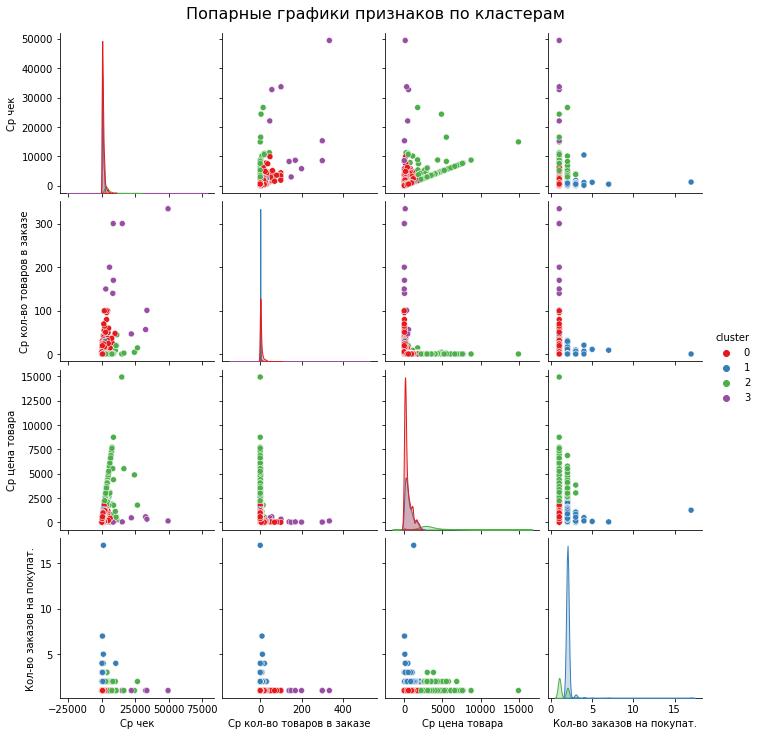

In [77]:
# Копируем данные для работы
clustered_data = df_features[['avg_check', 'avg_quantity', 'avg_price', 'total_orders','cluster']]

# Переименуем столбцы на русском для визуализации
clustered_data_rus = clustered_data.rename(columns={
    'avg_check': 'Ср чек',
    'avg_quantity': 'Ср кол-во товаров в заказе',
    'avg_price': 'Ср цена товара',
    'total_orders': 'Кол-во заказов на покупат.'
})

# Строим pairplot
sns.pairplot(clustered_data_rus, hue='cluster', palette='Set1', diag_kind='kde')

plt.suptitle('Попарные графики признаков по кластерам', fontsize=16, y=1.02)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


### Консолидированный вывод по кластеризации покупателей.

**На этом этапе была проделана следующая работа:**

1. **Формирование признаков для кластеризации.**
*Агрегация по customer_id* (таблица - df_features, где каждая строка — один клиент, а столбцы — его поведенческие признаки):
- средний чек за заказ (общая выручка / количество заказов) - avg_check,
- среднее количество товаров в заказе - avg_quantity,
- средняя цена одного товара (общая выручка / общее количество товаров) - avg_price,
- количество заказов на покупателя - total_orders.

2. **Масштабирование признаков:** нормализация данных через StandardScaler (приводим все числовые признаки к одному масштабу).

3. **Кластеризация методом KMeans.**
- определение числа кластеров - метод локтя и дендограммой;
- обучение модели KMeans;
- добавление метки cluster к каждому покупателю;
- визуализация результатов - методом понижение размерности с помощью PCA.

**Выводы.**
1. По дендограмме определено 4 кластера (k= 4).

***Анализ графика визуализации результата кластеризации.***

1.  Ось x *PCA компонент 1* отвечает за различия по показателям, связанным с средним чеком и средней ценой. Ось y *PCA компонент 2* отражает различия в поведенческих характеристиках, таких как частота покупок и объём заказов.

2. ***Выводы по кластерам:***
- *Кластер 0* (бирюзовый, центр низ)
    - поведение пользователей среднестатистическое;
    - умеренный средний чек, умеренное количество заказов, покупают в среднем по несколько товаров;
    - это может быть основная пользовательская масса, на которую опирается бизнес.
- *Кластер 1* (оранжевый, слева)
    - низкий средний чек и цена товара,
    - высокая частота покупок, но, возможно, мало товаров за раз,
    - это могут быть частые покупатели, приобретающие дешёвые товары небольшими объёмами.
- *Кластер 2* (синий, центр верх)
    - средний или высокий чек,
    - могут покупать более дорогие товары, 
    - покупают не очень часто, но больше, чем кластер 3,
    - это могут быть доходные клиенты с высокой средней стоимостью покупки, но не самые активные.
- *Кластер 3* (розовый, справа внизу)
    - очень высокий средний чек и цена товара (высокий PC1),
    - редкие и, возможно, крупные покупки (отрицательный PC2),
    - это премиальные клиенты или оптовики — немногочисленная группа, но с очень высокой ценностью.

## Анализ кластеров покупателей.

**Цель:** понять, чем отличаются друг от друга кластеры покупателей после кластеризации.

1. Анализ по ключевым метрикам по кластерам:
    - средний чек — сколько в среднем тратит покупатель за заказ;
    - частота — как часто покупатели из кластера делают заказы (в среднем);
    - выручка — сколько суммарно приносит кластер,
    - размер кластера.

2. Популярные категории товаров: какие категории товаров покупают чаще всего покупатели из каждого кластера.

3. Повторные покупки: проверю, сколько пользователей в кластере сделали более одного заказа. Это поможет понять: есть ли лояльные покупатели, какой процент пользователей — единоразовые.

4. Сезонность - в какие месяцы каждый кластер был наиболее активен.

Для анлиза кластеров объединю датафреймы df_features и df_filtered по customer_id , что бы все прзнаки попали в анализ. В дальнейшем анализе приму датафрейм df_merged.

In [78]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5355 entries, 0 to 7473
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              5355 non-null   datetime64[ns]
 1   customer_id       5355 non-null   object        
 2   order_id          5355 non-null   int64         
 3   product           5355 non-null   object        
 4   quantity          5355 non-null   int64         
 5   price             5355 non-null   float64       
 6   revenue           5355 non-null   float64       
 7   order_month       5355 non-null   object        
 8   category_product  5355 non-null   object        
 9   day_of_week       5355 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 589.2+ KB


In [79]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   2410 non-null   object 
 1   avg_check     2410 non-null   float64
 2   avg_price     2410 non-null   float64
 3   avg_quantity  2410 non-null   float64
 4   total_orders  2410 non-null   int64  
 5   cluster       2410 non-null   int32  
dtypes: float64(3), int32(1), int64(1), object(1)
memory usage: 103.7+ KB


In [80]:
df_merged = df_filtered.merge(
    df_features,
    on='customer_id',
    how='left'  # left join, чтобы сохранить все покупки
)

# проверка объединения
print(len(df_filtered), len(df_merged))  # Должны быть равны

5355 5355


In [81]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5355 entries, 0 to 5354
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              5355 non-null   datetime64[ns]
 1   customer_id       5355 non-null   object        
 2   order_id          5355 non-null   int64         
 3   product           5355 non-null   object        
 4   quantity          5355 non-null   int64         
 5   price             5355 non-null   float64       
 6   revenue           5355 non-null   float64       
 7   order_month       5355 non-null   object        
 8   category_product  5355 non-null   object        
 9   day_of_week       5355 non-null   int64         
 10  avg_check         5355 non-null   float64       
 11  avg_price         5355 non-null   float64       
 12  avg_quantity      5355 non-null   float64       
 13  total_orders      5355 non-null   int64         
 14  cluster           5355 n

### Анализ по ключевым метрикам.
- размер кластера (число клиентов),
- средняя цена за товар,
- средний чек — сколько в среднем тратит покупатель за заказ,
- среднее количество товаров в заказе,
- частота — число заказов на одного покупателя.


In [82]:
display(cluster_summary)

,Кол-во клиентов,Ср цена товара,Ср чек,Ср кол-во товаров,Кол-во заказов на клиента
cluster,,,,,
0,1412,422.670,920.730,5.390,1.000
1,810,607.770,695.130,1.610,2.060
2,178,3488.340,4408.110,1.820,1.350
3,10,176.320,18746.600,179.900,1.000


**Анализ ключевых метрик.**
1. **Кластер 0** 
- это самый многочисленный сигмент (1412 клиентов), со средней выручкой за заказ 920 уе, которые покупают товар со средним ценником 422 уе; количество товаров в заказе достаточно велико (~5 шт), но покупают не часто - 1 заказ на клиента;
- основной объем клиентов с низкой частотой покупок, при этом клиенты покупают много недорогих товаров за один раз. типичный провиль - редкие, но крупные заказы.
2. **Кластер 1**
- меньше покупателей, чем в 1 классе, но все равно много (810); покупают товар из среднего ценового сигмента (средняя цена 607 уе), но самый низкий средний чек (695 уе); среднее количество товаров в заказе ~2, но частопокупающие клиенты (2 заказа на клинта)
- покупатели с более высокой частотой заказов, но небольшим размером корзины. Можно рассматривать как лояльных клиентов, делающих частые и умеренные по стоимости покупки.
3. **Кластер 2**
- немногочисленный сегмент (178 покупателей); средний чек (4408 уе) и средняя цена за товар (3488 уе) высокие; достаточно активные клиенты (1.82 частота заказов), среднее количество товаров в заказе (1.35 шт);
- это премиум-сегмент - клиенты покупают дорогие товары, при этом нечасто и в небольшом количестве. Возможно, это целевая аудитория для премиального сервиса.
4. **Кластер 3**
- малочисленный кластер (10 покупателей), средний чек самый высокий (18 746 уе), но покупают самый дешевый товар (средний ценник 176 уе); объем товаров в заказе самый большой 180 шт, но покупают не часто (1 заказ на клиента);
- вероятнее всего это оптовый сегмент - малочисленная, но крайне активная группа с экстремально большим количеством недорогих товаров в одном заказе. 

### Популярные категории.
Оценю, какие категории товаров покупают чаще всего покупатели из каждого кластера.

In [83]:
# Считаем количество покупок в каждой категории для каждого кластера
popular_categories = (
    df_merged
    .groupby(['cluster', 'category_product'])
    .agg(purchases=('order_id', 'count'))  # считаем количество заказов
    .reset_index()
)

# сортировка внутри каждого кластера по популярности категории
popular_categories = (
    popular_categories
    .sort_values(['cluster', 'purchases'], ascending=[True, False])
)

display(popular_categories)


,cluster,category_product,purchases
4,0,Растения и рассада,2136
5,0,"Уборка, стирка, сушка и быт. химия",188
3,0,Кухонная утварь и посуда,168
1,0,Инструменты и хоз. товары,150
6,0,Хранение и сумки,147
0,0,Домашний текстиль,138
2,0,Искусственные цветы и декор,128
11,1,Растения и рассада,1128
12,1,"Уборка, стирка, сушка и быт. химия",195
13,1,Хранение и сумки,166


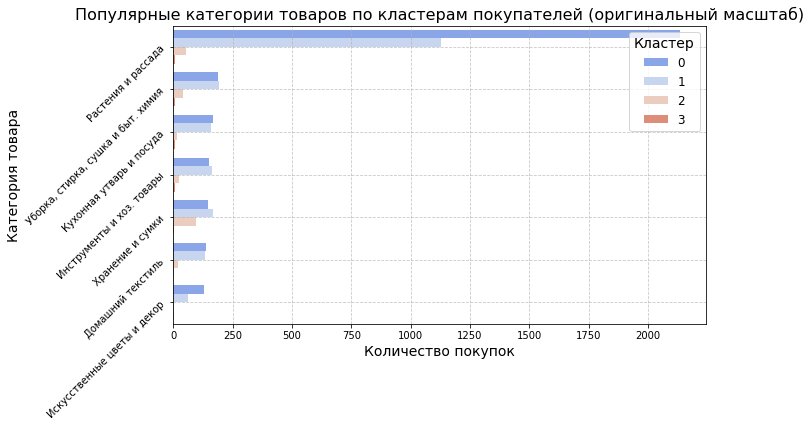

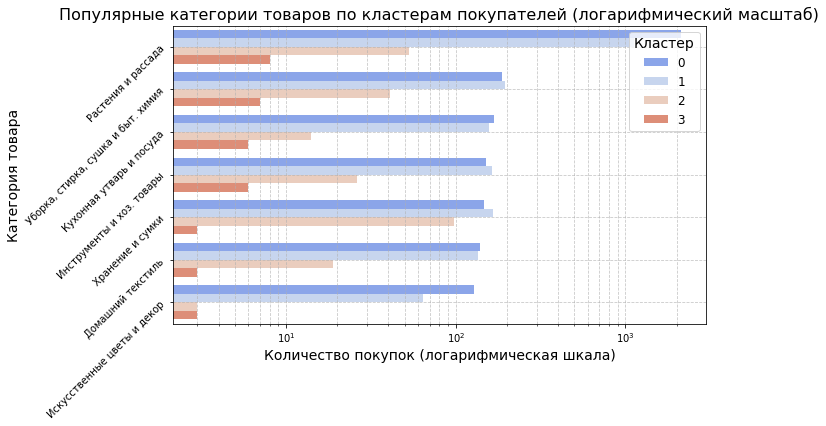

In [84]:
# Фигура 1 — оригинальный график
plt.figure(figsize=(10, 6))
sns.barplot(
    x='purchases',
    y='category_product',
    hue='cluster',
    data=popular_categories,
    palette='coolwarm'
)
plt.title('Популярные категории товаров по кластерам покупателей (оригинальный масштаб)', fontsize=16)
plt.xlabel('Количество покупок', fontsize=14)
plt.ylabel('Категория товара', fontsize=14)
plt.legend(title='Кластер', title_fontsize=14, fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Фигура 2 — масштабированный график (логарифмическая шкала)
plt.figure(figsize=(10, 6))
sns.barplot(
    x='purchases',
    y='category_product',
    hue='cluster',
    data=popular_categories,
    palette='coolwarm'
)
plt.xscale('log')
plt.title('Популярные категории товаров по кластерам покупателей (логарифмический масштаб)', fontsize=16)
plt.xlabel('Количество покупок (логарифмическая шкала)', fontsize=14)
plt.ylabel('Категория товара', fontsize=14)
plt.legend(title='Кластер', title_fontsize=14, fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7, which='both')
plt.xticks(rotation=0)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


**Анализ популярных категорий по кластерам:**
1. *Лидер категории*
- Растения и рассада является безусловным лидером по количеству покупок среди всех кластеров покупателей.
- Особенно сильно эта категория выделяется в кластере 0 и 1, где количество покупок значительно превышает аналогичные показатели в других категориях.
- Преобладание одной категории в этих кластерах может свидетельствовать о специфике потребностей этой группы: например, это могут быть покупатели, активно занимающиеся садоводством и огородничеством.

2. *Поведение остальных кластеров*
- Кластеры 2 и 3 демонстрируют более умеренный интерес к категории Растения и рассада, и их покупательское поведение распределено более равномерно между другими категориями товаров.
- кластер 0 так же активен в категории Искусственные цветы и декор.
- а кластер 2 заметно более активен в категории Хранение и сумки, по сравнению с другими категориями.
- кластер 3 покупает больше товаров в категории Растения и рассада, по сравнению с другими категориями.

3. *Различия в объёмах покупок*
- В других категориях объём покупок значительно ниже, чем в Растениях и рассаде, что подчёркивает монозависимость некоторых кластеров от одной категории.
- Тем не менее, даже в "домашних" категориях виден интерес разных кластеров, что позволяет делать вывод о разнообразии потребностей среди покупателей.

### Повторные покупки.
Проверю, сколько пользователей в кластере сделали более одного заказа. Это поможет понять: есть ли лояльные покупатели, какой процент пользователей — единоразовые.

In [85]:
# Группируем по пользователю и считаем количество уникальных заказов
orders_per_customer = df_merged.groupby(['customer_id', 'cluster'])['order_id'].nunique().reset_index()

# Добавляем флаг: сделал ли пользователь больше одного заказа
orders_per_customer['is_repeat_buyer'] = orders_per_customer['order_id'] > 1

# Считаем по кластерам
cluster_stats = (
    orders_per_customer.groupby('cluster')
    .agg(
        количество_покупателей=('customer_id', 'nunique'),
        повторные_покупатели=('is_repeat_buyer', 'sum')
    )
    .reset_index()
)

# Добавляем колонку с процентом повторных покупателей
cluster_stats['доля_повторных_покупателей_в_%'] = (
    cluster_stats['повторные_покупатели'] / cluster_stats['количество_покупателей'] * 100
)

display(cluster_stats)


,cluster,количество_покупателей,повторные_покупатели,доля_повторных_покупателей_в_%
0,0,1412,0,0.000
1,1,810,810,100.000
2,2,178,61,34.270
3,3,10,0,0.000


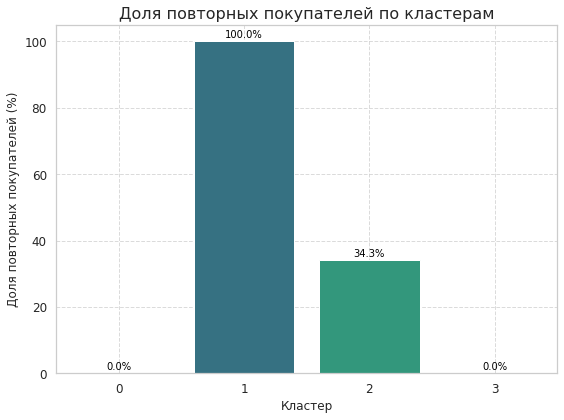

In [86]:
# Устанавливаем стиль графиков
sns.set(style="whitegrid")

# Создаём фигуру
plt.figure(figsize=(8, 6))

# Столбчатая диаграмма
sns.barplot(
    x='cluster',
    y='доля_повторных_покупателей_в_%',
    data=cluster_stats,
    palette='viridis'
)

# Добавляем подписи к столбцам
for index, row in cluster_stats.iterrows():
    plt.text(
        row['cluster'], 
        row['доля_повторных_покупателей_в_%'] + 1,  # Чуть выше столбца
        f"{row['доля_повторных_покупателей_в_%']:.1f}%", 
        color='black', 
        ha='center', 
        fontsize=10
    )

# Настройки графика
plt.title('Доля повторных покупателей по кластерам', fontsize=16)
plt.xlabel('Кластер', fontsize=12)
plt.ylabel('Доля повторных покупателей (%)', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**Анализ повторных покупок.**
- возвращаемость клиентов характерна только для 2-х кластеров: Кластер 1 (100% возврат) и кластер 2 (34,3% покупателей возвращаются за повторными покупками).
- кластер 0 и 3 - это "одноразовые" покупатели.


### Сезонность.


#### Активность кластеров по месяцам.

In [87]:
# Считаем количество заказов в каждом месяце для каждого кластера
seasonality = (
    df_merged
    .pivot_table(
        index='order_month',     # строки — месяцы
        columns='cluster',       # столбцы — кластеры
        values='order_id',       # считаем заказы
        aggfunc='nunique',       # уникальные заказы
        fill_value=0             # недостающие комбинации → 0
    )
)

display(seasonality)

cluster,0,1,2,3
order_month,,,,
2018-10,113,54,13,2
2018-11,111,50,20,3
2018-12,127,92,14,2
2019-01,79,69,11,0
2019-02,118,126,15,0
2019-03,120,100,14,1
2019-04,129,114,21,0
2019-05,103,64,11,1
2019-06,91,53,12,1


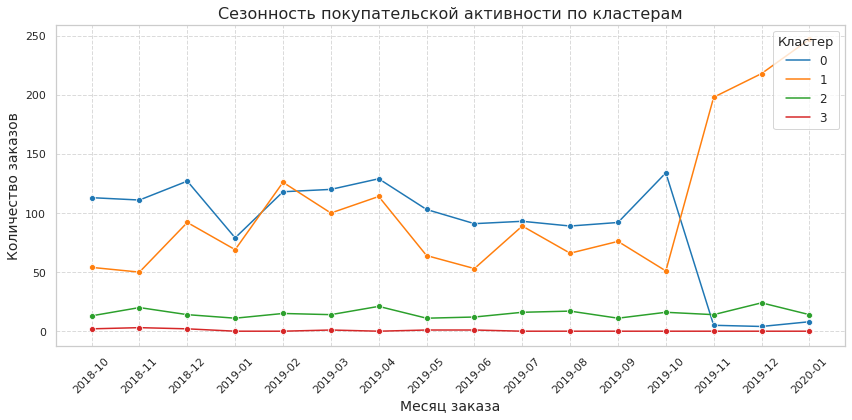

In [88]:
# Преобразуем сводную таблицу обратно в длинный формат
seasonality = seasonality.reset_index().melt(id_vars='order_month',
                                              var_name='cluster',
                                              value_name='количество_заказов')

# строим график
plt.figure(figsize=(12, 6))
sns.lineplot(data=seasonality, x='order_month', y='количество_заказов', hue='cluster', marker='o', palette='tab10')

plt.title('Сезонность покупательской активности по кластерам', fontsize=16)
plt.xlabel('Месяц заказа', fontsize=14)
plt.ylabel('Количество заказов', fontsize=14)
plt.legend(title='Кластер', fontsize=12, title_fontsize=13, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


Выведу график сезонности отдельно по каждому кластеру.

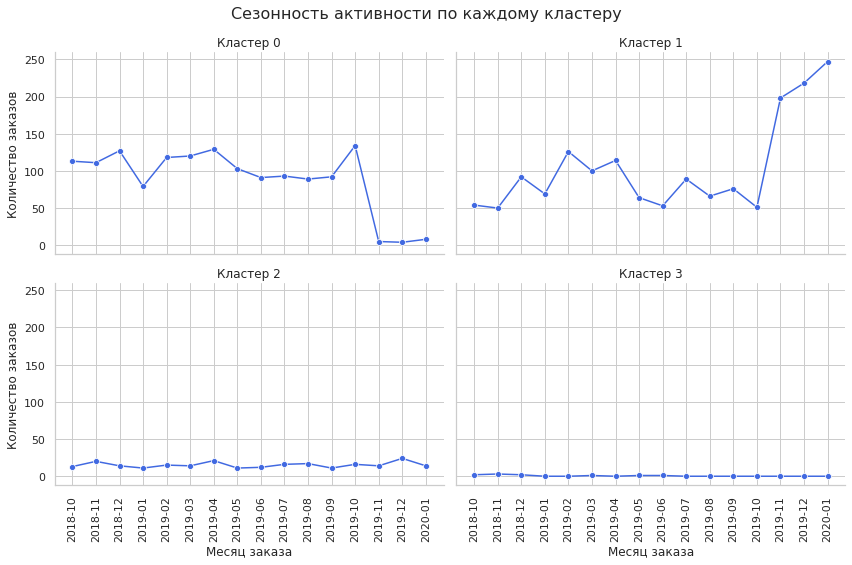

In [89]:
g = sns.FacetGrid(seasonality, col='cluster', col_wrap=2, height=4, aspect=1.5)
g.map_dataframe(sns.lineplot, x='order_month', y='количество_заказов', marker='o', color='royalblue')

g.set_titles('Кластер {col_name}')
g.set_axis_labels('Месяц заказа', 'Количество заказов')

# Поворачиваем подписи оси X на 90 градусов
for ax in g.axes.flatten():
    for label in ax.get_xticklabels():
        label.set_rotation(90)

g.fig.suptitle('Сезонность активности по каждому кластеру', fontsize=16)
g.tight_layout()
g.fig.subplots_adjust(top=0.9)

plt.show()


**Анализ графиков "Сезонность активности по кластерам":**
*На обоих графиках видно, что сезонные тренды различаются между кластерами, особенно во второй половине 2019 года.*

1. ***Кластер 0:***
- Относительно стабильные заказы в течение всего периода, но с октября 2019 — резкое падение. Это может быть связано с окончанием акций или изменениями в ассортименте.

2. ***Кластер 1:***
- Умеренная активность весь год, но в ноябре-декабре 2019 — резкий рост заказов, особенно в декабре. Вероятно, этот кластер хорошо отреагировал на сезонные или маркетинговые акции.
- Лояльный и активный сегмент, особенно чувствительный к праздникам или промо.

3. ***Кластер 2:***
- Низкая, но стабильная активность — без выраженных всплесков.
- Вероятно, малочувствителен к акциям.

4. ***Кластер 3:***
- Низкая, но стабильная активность — без выраженных всплесков.

5. ***Общие выводы:***
- Кластер 1 — ключевой для роста в пиковые сезоны, стоит делать акцент на удержание и маркетинговые предложения.
- Кластер 0 — важен по охвату, но требует стимулов для повторных покупок.
- Кластер 2 и 3 — приносят значительную выручку с единичных заказов, их стоит развивать через персонализированный подход.


#### Сезонность категорий товара по каждому кластеру.

In [90]:
# Преобразуем order_month в формат datetime
#df_merged['order_month'] = pd.to_datetime(df_merged['order_month'])

# Посчитаем количество заказов по кластерам, категориям и месяцам
category_seasonality = (
    df_merged.groupby(['cluster', 'order_month', 'category_product'])
    .agg({'order_id': 'nunique'})  # можно заменить на .size() или sum(quantity) при необходимости
    .reset_index()
    .rename(columns={'order_id': 'orders_count'})
)
display(category_seasonality)

,cluster,order_month,category_product,orders_count
0,0,2018-10,Домашний текстиль,17
1,0,2018-10,Инструменты и хоз. товары,15
2,0,2018-10,Искусственные цветы и декор,5
3,0,2018-10,Кухонная утварь и посуда,15
4,0,2018-10,Растения и рассада,55
...,...,...,...,...
298,3,2018-12,Инструменты и хоз. товары,1
299,3,2018-12,Хранение и сумки,1
300,3,2019-03,Инструменты и хоз. товары,1
301,3,2019-05,Искусственные цветы и декор,1


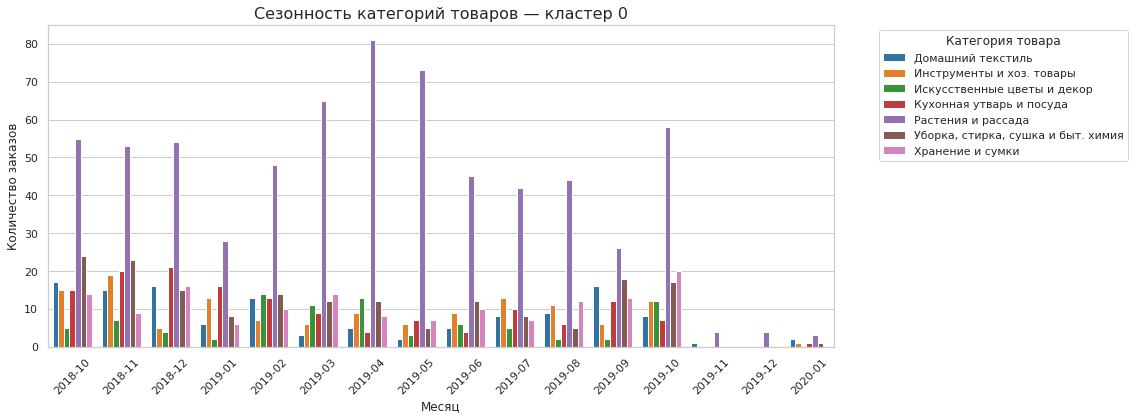

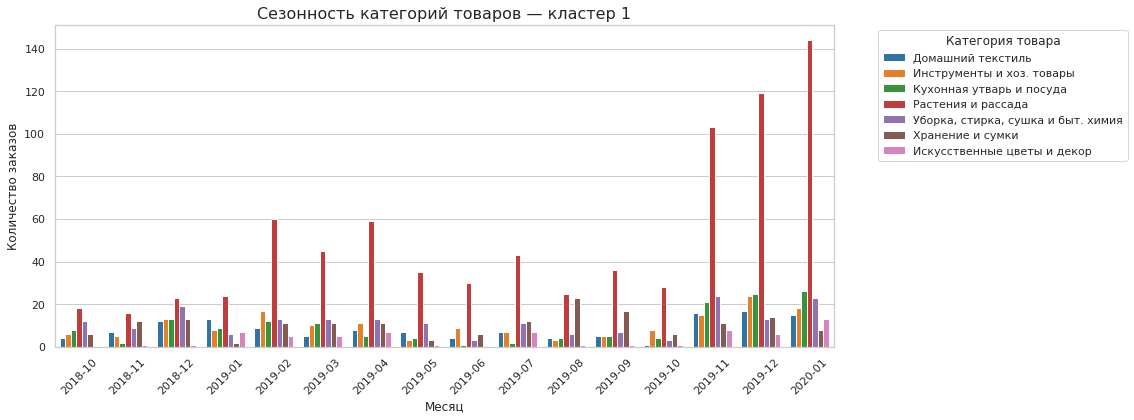

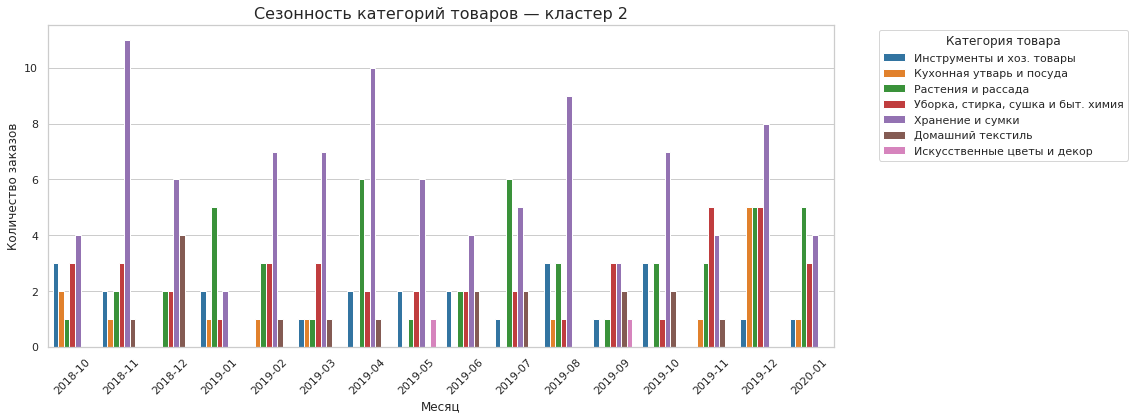

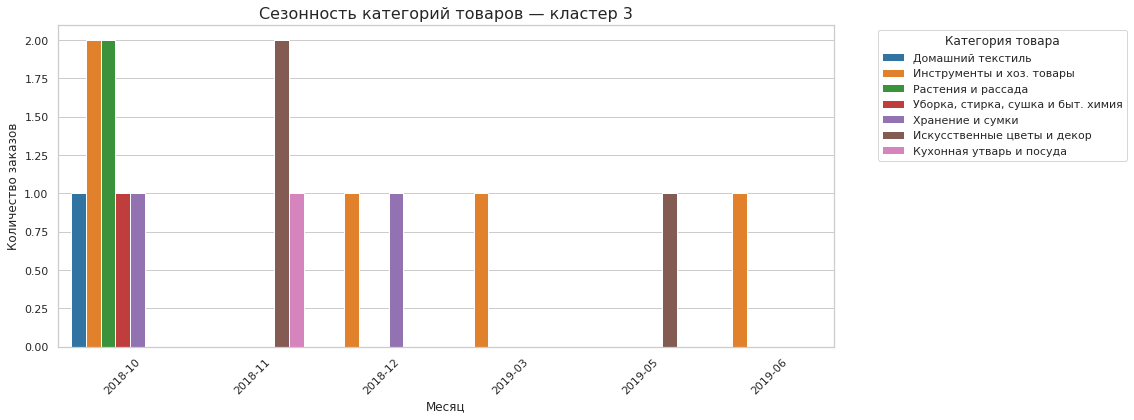

In [91]:
clusters = sorted(df_merged['cluster'].unique())

for cluster_id in clusters:
    plot_data = category_seasonality[category_seasonality['cluster'] == cluster_id]

    plt.figure(figsize=(16, 6))
    sns.barplot(
        data=plot_data,
        x='order_month',
        y='orders_count',
        hue='category_product',
        palette='tab10'
    )
    plt.title(f'Сезонность категорий товаров — кластер {cluster_id}', fontsize=16)
    plt.xlabel('Месяц')
    plt.ylabel('Количество заказов')
    plt.xticks(rotation=45)
    plt.legend(title='Категория товара', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


**Анализ графиков сезонности категорий товаров по кластерам**
1. ***Кластер 0:***
- за весь рассматриваемый период преобладает категория Растения и рассада, причем является основой всего товарного оборота. Основные месяцы продаж Растения и рассада: март, апрель (пик), май и октябрь.
- остальные категории представлены значительно в меньшем объеме. Прослеживается общий спад к маю 2019 и далее небольшой рост продаж.

2. ***Кластер 1:***
- так же как и в кластере 0 в значительной степени преобладает категория Растения и рассада, но максимальные продажи в осенне зимний период: 11-2019, 12-2019 и пик продаж 01-2020.
- остальные категории представлены в значительно меньшем объеме. прослеживается незначительное общее снижение продаж с мая по октябрь 2019. Так же видно, что 08-2019 - это максимальные продажи для категории Хранение и сумки.

3. ***Кластер 2:***
- преобладает категории Хранение и сумки и Растения и рассада, но в меньшей степени. Пик продаж для Хранения и сумки: 11-2018 (максимальные), 11-2019, 04-2019, 12-2019. Растения и рассада - это аперль и июль 2019.
- остальные категории значительно менее активны. прослеживаются сезонные всплески отдельных категорий:
    - декабрь - Добашний текстиль,
    - август и октябрь - Инструменты и хоз. товары,
    - ноябрь и декабрь - Уборка, стирка, сушка и быт. химия, кухонная утварь и посуда.

4. ***Кластер 3:***
- общая тенденция - к концу рассматриваемого периода прослеживается уменьшение количества заказываемых товарных категорий.
- 10-2018 - активны категории: Домашний текстиль, Инструменты и хоз товары, Растения и рассада, Уборка, стирка, глажка и быт химия, Хранение и сумки. Значительно выделяются по количеству продаж - инструменты и хоз товары, Растения и рассада.
- ноябрь-декабрь 2019 - Искусственные цветы и декор (максимальные продажи), Кухонная утварь и посуда, Инструменты и Хоз. товары, Хранение и сумки.
- 03-2019 - Инструменты и хоз. товары.
- 05-2019 Искусственные цветы и декор.
- 06-2019 Инструменты и хоз. товары.

### Консолидированный вывод по анализу кластеров покупателей.
Анализ позволил выделить четыре отчетливо различающихся кластера клиентов с уникальными характеристиками по активности, среднему чеку, ассортиментным предпочтениям, повторным покупкам и сезонному поведению. Это даёт возможность выстраивать более точечные и эффективные маркетинговые стратегии.

1. **Кластер 0** — Массовые, но нерегулярные покупатели со склонностью к крупным разовым покупкам
- *Характеристика:* самый крупный кластер (1412 клиентов), совершают один крупный заказ (~5 товаров) по средней цене 422 у.е. (чек ~920 у.е.).
- *Поведение:* предпочитают недорогие товары и совершают крупные, но единичные покупки.
- *Категории:* ярко выраженный интерес к Растениям и рассаде.
- *Сезонность:* активность стабильна до осени, затем падает.
- *Рекомендации:* 
    - запускать сезонные промо и мотивационные кампании для стимулирования повторных покупок;
    - использовать ассортимент-лидер (Растения и рассада) как якорь в рассылках и акциях.

2. **Кластер 1** — Лояльные, часто покупающие клиенты со средней корзиной
- *Характеристика:* 810 клиентов, делают частые покупки (в среднем 2 заказа) небольшого объёма (~2 товара), средний чек — 695 у.е., средняя цена товара — 607 у.е.
- *Поведение:* частые, умеренные по размеру покупки, высокий уровень возврата (100%).
- *Категории:* ключевая категория — Растения и рассада.
- *Сезонность:* всплеск в декабре, высокочувствительны к праздничным и промо-периодам.
- *Рекомендации:* удержание через программы лояльности, персональные рекомендации и промоакции, особенно в праздничные месяцы.

3. **Кластер 2** — премиальные клиенты с потенциальной ценностью
- *Характеристика:* 178 покупателей, средний чек — 4408 у.е., средняя цена товара — 3488 у.е., заказывают 1–2 товара.
- *Поведение:* редко, но дорого покупают; 34,3% возвращаются.
- *Категории:* склонность к товарам для хранения, сумкам и другим «премиальным» категориям.
- *Сезонность:* низкая, но стабильная активность.
- *Рекомендации:* персонализированные предложения, премиальный сервис, фокус на повторные покупки через индивидуальные email-кампании.

4. **Кластер 3** — малочисленные, но объёмные оптовые клиенты
- *Характеристика:* 10 клиентов, самый высокий чек (18 746 у.е.), покупают дешёвые товары (176 у.е.) в огромных количествах (180 шт. за заказ), совершают по 1 заказу.
- *Поведение:* редкие, но масштабные оптовые закупки.
- *Категории:* также склонны к покупке Растений и рассады, Искусственные цветы и декор, Инстркменты и хоз. товары.
- *Сезонность:* активность стабильна, без выраженных всплесков.
- *Рекомендации:* рассмотреть оптовую/корпоративную модель продаж, персонализированные B2B-условия.

5. **Основные стратегические выводы:**
- *Фокус на удержание:* кластер 1 — самый лояльный и отзывчивый к промо, требует постоянной маркетинговой поддержки.
- *Стимулирование повторных покупок:* кластеры 0 и 2 имеют потенциал роста через работу с возвращаемостью.
- *Премиум-подход:* кластер 2 — целевая аудитория для кастомизированных, дорогих предложений.
- *Развитие оптового канала:* кластер 3 показывает высокий потенциал для специальных условий закупок.
- *Сезонные кампании:* декабрь — ключевой период для кластера 1, весна — для кластера 0.

## Проверка статистических гипотез.

**Гипотеза 1:** различие среднего чека между кластерами.

**Гипотеза 2:** различие количества заказов между кластерами.

*В качестве нулевой гипотезы в обоих ниже приведенных задачах будет проверяться равенство срендних значений параметров. В качестве альтернативной гипотезы отсутствие их равенства.*

Т.к. выделено 4 кластера покупателей (множественная проверка гипотез), то для проверки гипотез можно применить тест  ANOVA (st.f_oneway) - непараметрический тест Краскала-Уоллиса, но ANOVA требует, чтобы данные в каждой группе имели нормальное распределение и примерно одинаковую дисперсию, если распределение не является нормальным, то использование ANOVA (дисперсионного анализа) становится некорректным. В случае, если распределение не нормальное, то применю непараметрический тест Крускала–Уоллиса вместо ANOVA.

Проверку на нормальность распределения средних значений по каждому кластеру проведу с помощью теста Шапиро–Уилка (shapiro).

Так как провожу множественные сравнения (парные сравнения между всеми кластерами), то нужно контролировать уровень ошибки первого рода (α), чтобы не получить ложноположительные результаты. Для после применения стат теста выполню коррекцию уровня статистической значимости.

In [92]:
# Разделим данные по кластерам
clusters = df_merged['cluster'].unique()

### Гипотеза 1: различие среднего чека между кластерами.

Задам нулевую и альтернативную гипотезы:
- H_0: нет различий в среднем чеки по кластерам (значения средних чеков по кластерам равны),
- H_1: есть различия в среднем чеке по кластерам.


**Проверка нормальности распределения значений средних чеков по каждому кластеру.**

In [93]:
samples_check = [group['avg_check'].values for name, group in df_merged.groupby('cluster')]

# Проверим нормальность распределения среднего чека в каждом кластере
for i, sample in enumerate(samples_check):
    stat, p = shapiro(sample)
    print(f'Кластер {clusters[i]}: p-value = {p:.5f} → {"нормальное" if p > 0.05 else "не нормальное"} распределение')

# Если все кластеры примерно нормальны, применяем ANOVA
anova_result = f_oneway(*samples_check)
print('\nANOVA результаты:')
print('F-статистика:', anova_result.statistic)
print('p-value:', anova_result.pvalue)


Кластер 0: p-value = 0.00000 → не нормальное распределение
Кластер 1: p-value = 0.00000 → не нормальное распределение
Кластер 2: p-value = 0.00000 → не нормальное распределение
Кластер 3: p-value = 0.00020 → не нормальное распределение

ANOVA результаты:
F-статистика: 3084.782028160503
p-value: 0.0


Поскольку распределения среднего чека в кластерах не соответствуют нормальному (по тесту Шапиро–Уилка, p ≤ 0.05), то для проверки гипотезы о различии средних чеков применю непараметрический тест Крускала–Уоллиса, который не требует соблюдения нормальности распределений.

**Проверка гипотезы.**

Пороговое значение приму за 5% (alpha = 0.05), как общепринятый.

In [94]:
# Вывод средних чеков по кластерам
print("Средние чеки по кластерам:")
print(df_merged.groupby('cluster')['avg_check'].mean())

# Применяем тест Крускала–Уоллиса
kruskal_result = kruskal(*samples_check)

# Выводим результаты
print('\nКрускал–Уоллис:')
print('H-статистика:', kruskal_result.statistic)
print('p-value:', kruskal_result.pvalue)

# Интерпретация
alpha = 0.05
if kruskal_result.pvalue < alpha:
    print("Отвергаем H_0: нет различий в среднем чеки по кластерам.")
else:
    print("Не удалось отвергнуть H_0: есть различия в среднем чеке по кластерам.")


Средние чеки по кластерам:
cluster
0    1371.244
1     783.385
2    4452.922
3   22376.000
Name: avg_check, dtype: float64

Крускал–Уоллис:
H-статистика: 1060.9422060610725
p-value: 1.0827341635000407e-229
Отвергаем H_0: нет различий в среднем чеки по кластерам.


На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) **ЕСТЬ** основания отвергнуть нулевую гипотезу (нет различий в среднем чеке по кластерам) в пользу альтернативной (есть различия в среднем чеке по кластерам). 

Посмотрю между какими кластерами есть эти различия. 

**Коррекция уровня статистической значимости.**

- Выполню несколько парных тестов между всеми возможными комбинациями кластеров.
- Поскольку данные не нормальны, используем Mann–Whitney U тест (непараметрический аналог t-теста).
- При множественных сравнениях растёт риск ложноположительных результатов (ошибки первого рода), чтобы это компенсировать, применю коррекцию Бонферрони.

In [95]:
# Количество пар
pair_count_с = len(list(combinations(clusters, 2)))

# Скорректированный уровень значимости по Бонферрони
bonferroni_alpha_с = alpha / pair_count_с

print(f"Всего парных сравнений: {pair_count_с}")
print(f"Скорректированный уровень значимости (Бонферрони): {bonferroni_alpha_с:.4f}")

# Выполняем парные сравнения
for c1, c2 in combinations(clusters, 2):
    group1_c = df_merged[df_merged['cluster'] == c1]['avg_check']
    group2_c = df_merged[df_merged['cluster'] == c2]['avg_check']
    stat, p = mannwhitneyu(group1_c, group2_c, alternative='two-sided')
    result = "Есть различие" if p < bonferroni_alpha_с else "Нет различий"
    print(f"Сравнение кластеров {c1} и {c2}: p-value = {p:.4f} -> {result}")


Всего парных сравнений: 6
Скорректированный уровень значимости (Бонферрони): 0.0083
Сравнение кластеров 0 и 1: p-value = 0.0000 -> Есть различие
Сравнение кластеров 0 и 2: p-value = 0.0000 -> Есть различие
Сравнение кластеров 0 и 3: p-value = 0.0000 -> Есть различие
Сравнение кластеров 1 и 2: p-value = 0.0000 -> Есть различие
Сравнение кластеров 1 и 3: p-value = 0.0000 -> Есть различие
Сравнение кластеров 2 и 3: p-value = 0.0000 -> Есть различие


Результаты анализа показали статистически значимые различия в среднем чеке между всеми парами кластеров (p-value < 0.0083). Это указывает на то, что каждый кластер характеризуется своим уникальным потребительским поведением, что важно учитывать при формировании маркетинговых стратегий и предложения ассортимента.

Посмотрю на распределение среднего чека по кластерам.

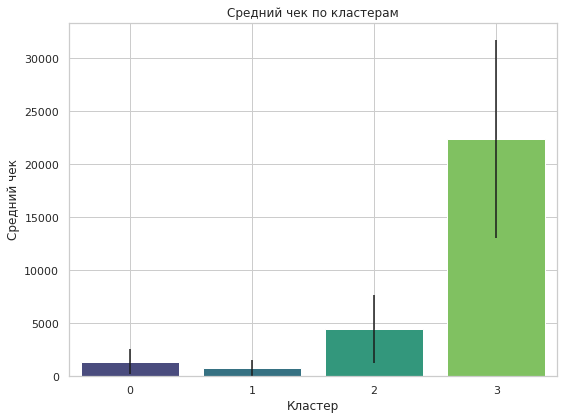

In [96]:
# Средние и стандартные отклонения
cluster_means = df_merged.groupby('cluster')['avg_check'].mean()
cluster_stds = df_merged.groupby('cluster')['avg_check'].std()

# График
plt.figure(figsize=(8, 6))
sns.barplot(
    x=cluster_means.index,
    y=cluster_means.values,
    yerr=cluster_stds.values,
    palette="viridis",
    capsize=0.1
)

plt.title('Средний чек по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Средний чек')
plt.grid(True)
plt.tight_layout()
plt.show()


### Вывод по проверке гипотезы 1: различие среднего чека между кластерами.
1. Поскольку распределения среднего чека в кластерах не соответствуют нормальному (по тесту Шапиро–Уилка, p ≤ 0.05), то для проверки гипотезы о различии средних чеков применила непараметрический тест Крускала–Уоллиса.
2. На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) **ЕСТЬ** основания отвергнуть нулевую гипотезу (нет различий в среднем чеке по кластерам) в пользу альтернативной (есть различия в среднем чеке по кластерам). 
3. Результаты теста Mann–Whitney U тест (непараметрический аналог t-теста) при скорректированном уровне значимости Бонферрони показали статистически значимые различия в среднем чеке между всеми парами кластеров (p-value < 0.0083). Это указывает на то, что каждый кластер характеризуется своим уникальным потребительским поведением, что важно учитывать при формировании маркетинговых стратегий и предложения ассортимента 

### **Гипотеза 2:** различие количества заказов между кластерами.
Задам нулевую и альтернативную гипотезы:
- H_0: количество заказов для каждго кластера одинаково (количество заказов по кластерам равны),
- H_1: есть различия в количестве заказов по кластерам.

Пороговое значение alpha = 5% (.05)

**Проверка нормальности распределения количества заказов.**

In [97]:
samples_orders = [group['total_orders'].values for name, group in df_merged.groupby('cluster')]

# Проверим нормальность распределения по каждому кластеру
for i, sample in enumerate(samples_orders):
    if len(sample) < 3 or sample.max() == sample.min():
        print(f"Кластер {i}: недостаточно данных или все значения одинаковы (нельзя проверить нормальность)")
    else:
        stat, p = shapiro(sample)
        print(f"Кластер {i}: p-value = {p:.4f} -> {'Нормальное' if p > 0.05 else 'Ненормальное'} распределение")

# Применяем ANOVA независимо от предупреждений (если нужно)
anova_result_o = f_oneway(*samples_orders)
print('\nANOVA результаты:')
print('F-статистика:', anova_result_o.statistic)
print('p-value:', anova_result_o.pvalue)



Кластер 0: недостаточно данных или все значения одинаковы (нельзя проверить нормальность)
Кластер 1: p-value = 0.0000 -> Ненормальное распределение
Кластер 2: p-value = 0.0000 -> Ненормальное распределение
Кластер 3: недостаточно данных или все значения одинаковы (нельзя проверить нормальность)

ANOVA результаты:
F-статистика: 800.838819825805
p-value: 0.0


Поскольку распределения количества заказов на покупателя в кластерах 1 и 2 не соответствуют нормальному (по тесту Шапиро–Уилка, p ≤ 0.05), то для проверки гипотезы о различие количества заказов между кластерами применю непараметрический тест Крускала–Уоллиса, который не требует соблюдения нормальности распределений.

**Проверка гипотезы.**

Пороговое значение приму за 5% (alpha = 0.05), как общепринятый.

In [98]:
# Вывод заказов по кластерам
print("Количество заказов на покупателя по кластерам:")
print(df_merged.groupby('cluster')['total_orders'].mean())

kruskal_result = kruskal(*samples_orders)
print('\nКрускал–Уоллис:')
print('H-статистика:', kruskal_result.statistic)
print('p-value:', kruskal_result.pvalue)

alpha = 0.05
if kruskal_result.pvalue < alpha:
    print("Отвергаем H_0: есть различия в количестве заказов между кластерами.")
else:
    print("Не отвергаем H_0: различий между кластерами не найдено.")


Количество заказов на покупателя по кластерам:
cluster
0   1.000
1   2.311
2   1.520
3   1.000
Name: total_orders, dtype: float64

Крускал–Уоллис:
H-статистика: 4970.23821282842
p-value: 0.0
Отвергаем H_0: есть различия в количестве заказов между кластерами.


На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) **ЕСТЬ** основания отвергнуть нулевую гипотезу (количество заказов для каждго кластера одинаково) в пользу альтернативной (есть различия в количестве заказов по кластерам). 

Посмотрю между какими кластерами есть эти различия. 

**Коррекция уровня статистической значимости.**

- Выполню несколько парных тестов между всеми возможными комбинациями кластеров.
- Поскольку данные не нормальны, используем Mann–Whitney U тест (непараметрический аналог t-теста).
- При множественных сравнениях растёт риск ложноположительных результатов (ошибки первого рода), чтобы это компенсировать, применю коррекцию Бонферрони.

In [99]:
# Количество пар
pair_count_o = len(list(combinations(clusters, 2)))

# Скорректированный уровень значимости по Бонферрони
bonferroni_alpha_o = alpha / pair_count_o

print(f"Всего парных сравнений: {pair_count_o}")
print(f"Скорректированный уровень значимости (Бонферрони): {bonferroni_alpha_o:.4f}")

# Выполняем парные сравнения
for o1, o2 in combinations(clusters, 2):
    group1_o = df_merged[df_merged['cluster'] == o1]['total_orders']
    group2_o = df_merged[df_merged['cluster'] == o2]['total_orders']
    stat, p = mannwhitneyu(group1_o, group2_o, alternative='two-sided')
    result = "Есть различие" if p < bonferroni_alpha_o else "Нет различий"
    print(f"Сравнение кластеров {o1} и {o2}: p-value = {p:.4f} -> {result}")

Всего парных сравнений: 6
Скорректированный уровень значимости (Бонферрони): 0.0083
Сравнение кластеров 0 и 1: p-value = 0.0000 -> Есть различие
Сравнение кластеров 0 и 2: p-value = 0.0000 -> Есть различие
Сравнение кластеров 0 и 3: p-value = 1.0000 -> Нет различий
Сравнение кластеров 1 и 2: p-value = 0.0000 -> Есть различие
Сравнение кластеров 1 и 3: p-value = 0.0000 -> Есть различие
Сравнение кластеров 2 и 3: p-value = 0.0000 -> Есть различие


Результаты анализа показали статистически значимые различия в заказе на 1 покупателя между всеми парами кластеров (p-value < 0.0083), кроме пары 0 и 3. Это указывает на то, что каждый кластер характеризуется своим уникальным потребительским поведением, что важно учитывать при формировании маркетинговых стратегий и предложения ассортимента.

Посмотрю на распределение заказов по кластерам.

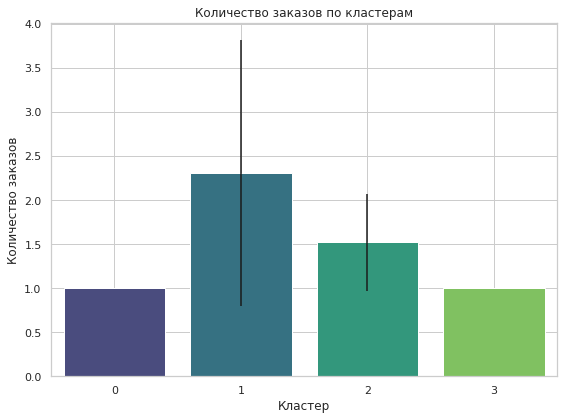

In [100]:
# Средние и стандартные отклонения
orders_means = df_merged.groupby('cluster')['total_orders'].mean()
orders_stds = df_merged.groupby('cluster')['total_orders'].std()

# График
plt.figure(figsize=(8, 6))
sns.barplot(
    x=orders_means.index,
    y=orders_means.values,
    yerr=orders_stds.values,
    palette="viridis",
    capsize=0.1
)

plt.title('Количество заказов по кластерам')
plt.xlabel('Кластер')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.tight_layout()
plt.show()


### Вывод по проверки гипотезы 2: различие количества заказов между кластерами.
1. Поскольку распределения среднего чека в кластерах не соответствуют нормальному (по тесту Шапиро–Уилка, p ≤ 0.05), то для проверки гипотезы о различии средних чеков применила непараметрический тест Крускала–Уоллиса.
2. На имеющихся данных, на уровне значимости 5% (уровне доверия 95%) **ЕСТЬ** основания отвергнуть нулевую гипотезу (количество заказов для каждго кластера одинаково) в пользу альтернативной ( есть различия в количестве заказов по кластерам). 
3. Результаты анализа показали статистически значимые различия в заказе на 1 покупателя между всеми парами кластеров (p-value < 0.0083), кроме пары 0 и 3. Это указывает на то, что каждый кластер характеризуется своим уникальным потребительским поведением, что важно учитывать при формировании маркетинговых стратегий и предложения ассортимента.

### Консолидированный вывод по результатам проверки гипотез.
1. В качестве нулевой гипотезы в обоих задачах проверялось равенство значений двух параметров. В качестве альтернативной гипотезы отсутствие их равенства.
2. В качестве критерия проверки гипотезы использовала пороговое значение alpha = 5% (.05). Подобное значение выбрано из двух общепринятых 1% и 5%, в свзи с тем, что проверяются значения не требующие высокой точности.
3. Выбранный метод: после проверки нормальности распределения (по тесту Шапиро–Уилка, p ≤ 0.05), которое показала, что распределение проверяемых данных ненормально, принято решение применить непараметрический тест Крускала–Уоллиса, который не требует соблюдения нормальности распределений.
4. Выполнена коррекция уровня статистических данных и проведен анализ попарного сравнения кластеров:
    - поскольку данные не нормальны, использован Mann–Whitney U тест (непараметрический аналог t-теста),
    - при множественных сравнениях растёт риск ложноположительных результатов (ошибки первого рода), чтобы это компенсировать, применена коррекцию Бонферрони.

**Результаты проверки гипотез:**
1. *Гипотеза 1: различие среднего чека между кластерами.* 
    - на имеющихся данных, на уровне значимости 5% (уровне доверия 95%) ЕСТЬ основания отвергнуть нулевую гипотезу (средние чеки по кластерам равны) в пользу альтернативной (есть различия в среднем чеке между кластерами).
    - результаты теста Mann–Whitney U тест (непараметрический аналог t-теста) при скорректированном уровне значимости Бонферрони показали статистически значимые различия в среднем чеке между всеми парами кластеров (p-value < 0.0083). Это указывает на то, что каждый кластер характеризуется своим уникальным потребительским поведением, что важно учитывать при формировании маркетинговых стратегий и предложения ассортимента 

2. *Гипотеза 2: различие количества заказов между кластерами.*
    - на имеющихся данных, на уровне значимости 5% (уровне доверия 95%) ЕСТЬ основания отвергнуть нулевую гипотезу (количество заказов для каждго кластера одинаково) в пользу альтернативной ( есть различия в количестве заказов по кластерам).
    - результаты анализа показали статистически значимые различия в заказе на 1 покупателя между всеми парами кластеров (p-value < 0.0083), кроме пары 0 и 3. Это указывает на то, что каждый кластер характеризуется своим уникальным потребительским поведением, что важно учитывать при формировании маркетинговых стратегий и предложения ассортимента.


## Выводы и рекомендации.

**Основные задачи, которые выполнены в проекте:**
1. Предобработка данных - выявлены и удалены неявные дубликаты, заказы с более чем одним покупателем, т.к. такие данные будут искажить информацию.
2. Категоризация товров - все товары распределены по 7 условным категориям и далее анализ основывался на категориях товаров.
3. Исследовательский анализ - выявлены и удалены из анализа выбросы; проведен анализ покупателей, временной анализ, анализ корреляции.
4. Кластеризация покупателей - методом KMeans, определено 4 кластера покупателй.
5. Анализ кластеров покупателей - по ключевым метрикам, популярные категории, повторные покупки, сезонность.
6. Проверка статистических гипотез:
    - Гипотеза 1: различие среднего чека между кластерами,
    - Гипотеза 2: различие количества заказов между кластерами.

Проект по анализу товарного ассортимента и сегментации покупателей для интернет-магазина товаров для дома «Пока все ещё тут» направлен на оптимизацию рекламных рассылок и повышение эффективности продаж. В ходе анализа были получены ценные данные, которые позволели сегментировать покупателей по 4 кластерам, каждый из которых имеет разный уровень ценности для бизнеса: поведение пользователей, средний чек, повторные покупки и предпочтения по категориям позволяют разработать разные маркетинговые стратегии для каждого кластера.

**Сводка по кластерам и рекомендации по рассылкам.**
1.  ***Кластер 0*** — Редкие, но объёмные покупки (основной массовый сегмент)
- Профиль:
    - 1412 клиентов
    - Средний чек ~920 уе
    - Средняя цена товара ~422 уе
    - примерно 5 товаров в заказе
    - 1 заказ на клиента
- Основная категория: Растения и рассада, затем Искусственные цветы и декор
- Рекомендации:
    - Ценность: средняя — покупают редко, но объёмно
    - Цель: увеличить повторные заказы
    - Тактика рассылки: триггерные e-mail или push через ~3 месяца после первой покупки. Рассылки перед сезоном (февраль/март и август/сентябрь) с подборками по категориям сад-огород. Подсказки «что купить ещё» из смежных категорий (напр. "декор для сада", "хранение").

2. ***Кластер 1*** — Лояльные покупатели с недорогими заказами
- Профиль:
    - 810 клиентов
    - Средний чек ~695 уе
    - Средняя цена ~607 уе
    - ~2 товара в заказе
    - 2 заказа на клиента
    - 100% возвращаемость
- Категория: Растения и рассада (осенью/зимой), Хранение и сумки в августе
- Рекомендации:
    - Ценность: высокая — лояльный, чувствителен к акциям
    - Цель: расширение корзины и удержание
    - Тактика рассылки: регулярные рассылки с акциями и сезонными предложениями (октябрь–январь — пиковая активность). Кросс-селлинг: предлагать дополняющие товары (например, к растениям — горшки, удобрения). Индивидуальные предложения по предыдущим покупкам.
    
3. ***Кластер 2***— Премиальные индивидуальные клиенты
- Профиль:
    - 178 клиентов
    - Высокий чек (4408 уе), цена товара (3488 уе)
    - ~1.35 товара на заказ
    - Частота заказов — 1.82
- Категории: Хранение и сумки, также Растения, Домашний текстиль
- Рекомендации:
    - Ценность: высокая — высокодоходные клиенты
    - Цель: повышение возвращаемости
    - Тактика рассылки: персонализированные рассылки с премиальными товарами, подборками "для дома с заботой". Товары в красивом оформлении, с бонусом или подарочной упаковкой. Делать акцент на стиле, эксклюзивности и новинках. Частота рассылок — умеренная, только по важным поводам (Новый год, весна).

4. ***Кластер 3*** — Оптовики или крупные покупатели недорогого товара
- Профиль:
    - 10 клиентов
    - Самый высокий средний чек (18 746 уе), но самая низкая цена товара (~176 уе)
    - ~180 товаров за заказ
    - 1 заказ на клиента
- Категории: Инструменты, Растения, Быт. химия
- Рекомендации:
    - Ценность: высокая в разовом объёме, но нет повторных покупок
    - Цель: выявление и удержание оптовиков
    - Тактика рассылки: Персональные предложения от менеджера: скидки на крупные партии. Оптовые акции, программа лояльности. Информирование о поступлениях нужных категорий, упаковки, товаров для бизнеса.

**Общие рекомендации по категориям товаров.**
1. Растения и рассада: кластеры 0,1; сезон активности - Март–май, октябрь–январь; тактика - подборки под сезон, советы по уходу.
2. Хранение и сумки: кластеры 1, 2; сезон активности - Август, ноябрь, декабрь; тактика - Рассылки перед праздниками и сезоном уборки.
3. Искусственные цветы и декор: кластеры 0; сезон активности - весна; тактика - Декор-подборки к праздникам.
4. Домашний текстиль: кластеры 2, 3; сезон активности - декабрь; тактика - Обнови интерьер к празднику.
5. Инструменты и хоз. товары: кластеры 3; сезон активности - октябрь; тактика - Рассылки "под сезон", подборки "для дачи".

**Общие рекомендации по коммуникационной стратегии.**
1. Разделить базу по кластерам и настраивать разные цепочки рассылок по каждому сценарию.
2. Автоматизировать рассылки по триггерам:
- отсутствие покупок 2+ месяца
- завершение сезона основного интереса
- праздники и акции
3. Использовать A/B тесты на разных кластерах (темы письма, категории товаров).
4. Добавить push-уведомления и sms для кластеров 1 и 2 — особенно в период активности.
5. Контент рассылок персонализировать: использовать имя, последние покупки, рекомендации на основе предпочтений кластера.

**Приоритеты вложений в маркетинг:**
- Кластер 1 — основная зона роста: высокочастотные, лояльные, реагируют на сезон.
- Кластер 2 — высокая выручка, нуждается в персонализации и "премиальном подходе".
- Кластер 0 — требует стимулов для повторных покупок.
- Кластер 3 — персональное обслуживание (возможен переход на b2b-подход).
